# Task
Analyze the relationship between Bitcoin Fear/Greed sentiment and Hyperliquid trader performance using the provided "historical_data.csv" and "fear_greed_index.csv" datasets. The analysis should cover data loading, cleaning, merging, engineering performance features, analyzing sentiment vs. performance, analyzing behavioral changes, segmenting traders, extracting insights, formulating strategy rules, and building a profitability classifier, concluding with a summary of findings and strategies.

## Define Problem Statement

### Subtask:
Clearly articulate the objective of the analysis: understanding the relationship between Bitcoin Fear/Greed sentiment and Hyperliquid trader performance, and define hypotheses.


### Objective of the Analysis

The main objective of this analysis is to investigate and understand the relationship between the Bitcoin Fear & Greed Index (FGI) sentiment and the trading performance of traders on the Hyperliquid decentralized exchange. Specifically, we aim to determine if and how changes in Bitcoin sentiment, as reflected by the FGI, correlate with profitability, trading activity, or other performance metrics of Hyperliquid traders.

### Hypotheses

1.  **Hypothesis 1 (Profitability):** Traders are more likely to exhibit lower profitability (e.g., lower P&L ratios, higher liquidation rates) during periods of extreme Fear (low FGI values) due to panic selling or irrational decision-making, and higher profitability during periods of Greed (high FGI values) due to overconfidence, potentially leading to more aggressive, yet profitable, trading.
2.  **Hypothesis 2 (Trading Activity):** There will be a significant increase in trading volume and the number of active traders on Hyperliquid during periods of extreme sentiment (both Fear and Greed) compared to periods of neutral sentiment, as market participants react more strongly to perceived opportunities or threats.
3.  **Hypothesis 3 (Behavioral Bias):** Traders will exhibit a stronger tendency to 'buy the dip' during periods of extreme fear (low FGI) and 'sell into strength' during periods of extreme greed (high FGI), indicating a reactive rather than proactive trading strategy influenced by market sentiment.

## Load Data and Overview

### Subtask:
Load 'historical_data.csv' (trader data) and 'fear_greed_index.csv' (sentiment data) into pandas DataFrames. Display the first few rows, column names, data types, check for missing values, and identify duplicate rows for both datasets.


**Reasoning**:
The first step is to import the pandas library, which is necessary for data manipulation and reading CSV files. I will then proceed to load the first dataset, perform initial data checks, and display the first few rows.



In [1]:
import pandas as pd

# Load historical_data.csv
historical_data_df = pd.read_csv('historical_data.csv')

print("### historical_data_df Overview ###")
print("\nFirst 5 rows of historical_data_df:")
print(historical_data_df.head())

print("\nColumn names and data types of historical_data_df:")
historical_data_df.info()

print("\nMissing values in historical_data_df:")
print(historical_data_df.isnull().sum())

print("\nDuplicate rows in historical_data_df:")
print(historical_data_df.duplicated().sum())

### historical_data_df Overview ###

First 5 rows of historical_data_df:
                                      Account  Coin  Execution Price  \
0  0xae5eacaf9c6b9111fd53034a602c192a04e082ed  @107           7.9769   
1  0xae5eacaf9c6b9111fd53034a602c192a04e082ed  @107           7.9800   
2  0xae5eacaf9c6b9111fd53034a602c192a04e082ed  @107           7.9855   
3  0xae5eacaf9c6b9111fd53034a602c192a04e082ed  @107           7.9874   
4  0xae5eacaf9c6b9111fd53034a602c192a04e082ed  @107           7.9894   

   Size Tokens  Size USD Side     Timestamp IST  Start Position Direction  \
0       986.87   7872.16  BUY  02-12-2024 22:50        0.000000       Buy   
1        16.00    127.68  BUY  02-12-2024 22:50      986.524596       Buy   
2       144.09   1150.63  BUY  02-12-2024 22:50     1002.518996       Buy   
3       142.98   1142.04  BUY  02-12-2024 22:50     1146.558564       Buy   
4         8.73     69.75  BUY  02-12-2024 22:50     1289.488521       Buy   

   Closed PnL                  

/tmp/ipython-input-2794970153.py:4: DtypeWarning: Columns (12) have mixed types. Specify dtype option on import or set low_memory=False.
  historical_data_df = pd.read_csv('historical_data.csv')


**Reasoning**:
Following the previous step which loaded and overviewed `historical_data.csv`, the next logical step according to the subtask is to load and perform similar initial data checks for the `fear_greed_index.csv` dataset.



In [2]:
fear_greed_df = pd.read_csv('fear_greed_index.csv')

print("\n### fear_greed_df Overview ###")
print("\nFirst 5 rows of fear_greed_df:")
print(fear_greed_df.head())

print("\nColumn names and data types of fear_greed_df:")
fear_greed_df.info()

print("\nMissing values in fear_greed_df:")
print(fear_greed_df.isnull().sum())

print("\nDuplicate rows in fear_greed_df:")
print(fear_greed_df.duplicated().sum())


### fear_greed_df Overview ###

First 5 rows of fear_greed_df:
    timestamp  value classification        date
0  1517463000     30           Fear  2018-02-01
1  1517549400     15   Extreme Fear  2018-02-02
2  1517635800     40           Fear  2018-02-03
3  1517722200     24   Extreme Fear  2018-02-04
4  1517808600     11   Extreme Fear  2018-02-05

Column names and data types of fear_greed_df:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2644 entries, 0 to 2643
Data columns (total 4 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   timestamp       2644 non-null   int64 
 1   value           2644 non-null   int64 
 2   classification  2644 non-null   object
 3   date            2644 non-null   object
dtypes: int64(2), object(2)
memory usage: 82.8+ KB

Missing values in fear_greed_df:
timestamp         0
value             0
classification    0
date              0
dtype: int64

Duplicate rows in fear_greed_df:
0


## Clean and Merge Data

### Subtask:
Convert relevant timestamp columns in both datasets to datetime objects, create daily date columns for merging, handle missing values, and merge the sentiment data with the trader data.


**Reasoning**:
The first step is to convert the 'Timestamp IST' column in `historical_data_df` to a datetime object with the specified format to enable time-based operations and merging.



In [3]:
historical_data_df['Timestamp IST'] = pd.to_datetime(historical_data_df['Timestamp IST'], format='%d-%m-%Y %H:%M')

print("Converted 'Timestamp IST' to datetime:")
print(historical_data_df['Timestamp IST'].head())
print(historical_data_df['Timestamp IST'].dtype)

Converted 'Timestamp IST' to datetime:
0   2024-12-02 22:50:00
1   2024-12-02 22:50:00
2   2024-12-02 22:50:00
3   2024-12-02 22:50:00
4   2024-12-02 22:50:00
Name: Timestamp IST, dtype: datetime64[ns]
datetime64[ns]


**Reasoning**:
Following the conversion of 'Timestamp IST' in `historical_data_df`, the next logical step is to convert the 'date' column in `fear_greed_df` to datetime objects as specified in the instructions to enable further time-based operations and merging.



In [4]:
fear_greed_df['date'] = pd.to_datetime(fear_greed_df['date'])

print("Converted 'date' to datetime in fear_greed_df:")
print(fear_greed_df['date'].head())
print(fear_greed_df['date'].dtype)

Converted 'date' to datetime in fear_greed_df:
0   2018-02-01
1   2018-02-02
2   2018-02-03
3   2018-02-04
4   2018-02-05
Name: date, dtype: datetime64[ns]
datetime64[ns]


**Reasoning**:
Now that both timestamp columns are converted to datetime objects, the next step is to create a 'daily_date' column in `historical_data_df` by extracting only the date part from 'Timestamp IST', as required for merging.



In [5]:
historical_data_df['daily_date'] = historical_data_df['Timestamp IST'].dt.date

print("Created 'daily_date' in historical_data_df:")
print(historical_data_df[['Timestamp IST', 'daily_date']].head())
print(historical_data_df['daily_date'].dtype)

Created 'daily_date' in historical_data_df:
        Timestamp IST  daily_date
0 2024-12-02 22:50:00  2024-12-02
1 2024-12-02 22:50:00  2024-12-02
2 2024-12-02 22:50:00  2024-12-02
3 2024-12-02 22:50:00  2024-12-02
4 2024-12-02 22:50:00  2024-12-02
object


**Reasoning**:
Following the creation of 'daily_date' in `historical_data_df`, the next step is to create a similar 'daily_date' column in `fear_greed_df` by extracting the date part from its 'date' column, which is already in datetime format.



In [6]:
fear_greed_df['daily_date'] = fear_greed_df['date'].dt.date

print("Created 'daily_date' in fear_greed_df:")
print(fear_greed_df[['date', 'daily_date']].head())
print(fear_greed_df['daily_date'].dtype)

Created 'daily_date' in fear_greed_df:
        date  daily_date
0 2018-02-01  2018-02-01
1 2018-02-02  2018-02-02
2 2018-02-03  2018-02-03
3 2018-02-04  2018-02-04
4 2018-02-05  2018-02-05
object


**Reasoning**:
Now that 'daily_date' columns are created in both dataframes, the next step is to handle the missing values in `historical_data_df` as per the instructions, specifically dropping rows where 'Fee', 'Trade ID', and the float 'Timestamp' columns have missing values.



In [7]:
historical_data_df.dropna(subset=['Fee', 'Trade ID', 'Timestamp'], inplace=True)

print("Missing values in historical_data_df after dropping rows:")
print(historical_data_df.isnull().sum())

Missing values in historical_data_df after dropping rows:
Account             0
Coin                0
Execution Price     0
Size Tokens         0
Size USD            0
Side                0
Timestamp IST       0
Start Position      0
Direction           0
Closed PnL          0
Transaction Hash    0
Order ID            0
Crossed             0
Fee                 0
Trade ID            0
Timestamp           0
daily_date          0
dtype: int64


**Reasoning**:
With all necessary data transformations and missing value handling completed, the final step for this subtask is to merge the `historical_data_df` and `fear_greed_df` using an outer merge on the 'daily_date' column, as specified in the instructions.



In [8]:
merged_df = pd.merge(historical_data_df, fear_greed_df, on='daily_date', how='outer', suffixes=('_trader', '_sentiment'))

print("First 5 rows of merged_df:")
print(merged_df.head())
print("\nShape of merged_df:", merged_df.shape)
print("\nMissing values in merged_df after merge:")
print(merged_df.isnull().sum())

First 5 rows of merged_df:
  Account Coin  Execution Price  Size Tokens  Size USD Side Timestamp IST  \
0     NaN  NaN              NaN          NaN       NaN  NaN           NaT   
1     NaN  NaN              NaN          NaN       NaN  NaN           NaT   
2     NaN  NaN              NaN          NaN       NaN  NaN           NaT   
3     NaN  NaN              NaN          NaN       NaN  NaN           NaT   
4     NaN  NaN              NaN          NaN       NaN  NaN           NaT   

   Start Position Direction  Closed PnL  ... Order ID  Crossed Fee  Trade ID  \
0             NaN       NaN         NaN  ...      NaN      NaN NaN       NaN   
1             NaN       NaN         NaN  ...      NaN      NaN NaN       NaN   
2             NaN       NaN         NaN  ...      NaN      NaN NaN       NaN   
3             NaN       NaN         NaN  ...      NaN      NaN NaN       NaN   
4             NaN       NaN         NaN  ...      NaN      NaN NaN       NaN   

   Timestamp  daily_date     

## Engineer Performance Features

### Subtask:
Calculate daily PnL per trader, daily win rate, daily number of trades, daily average trade size, daily total notional value traded (as a proxy for exposure/leverage), daily long/short ratio, daily PnL volatility, and a daily drawdown proxy using cumulative PnL for each trader.


**Reasoning**:
The first step in engineering performance features is to filter the merged DataFrame to isolate actual trader activity by removing rows where the 'Account' column is null, as specified in the instructions. This creates `trader_data_df` which will be used for subsequent calculations.



In [9]:
trader_data_df = merged_df[merged_df['Account'].notna()].copy()

print("Shape of trader_data_df after filtering:", trader_data_df.shape)
print("First 5 rows of trader_data_df after filtering:\n", trader_data_df.head())

Shape of trader_data_df after filtering: (69810, 21)
First 5 rows of trader_data_df after filtering:
                                          Account Coin  Execution Price  \
2130  0xb1231a4a2dd02f2276fa3c5e2a2f3436e6bfed23  ETH           2230.1   
2131  0xb1231a4a2dd02f2276fa3c5e2a2f3436e6bfed23  ETH           2230.1   
2132  0xb1231a4a2dd02f2276fa3c5e2a2f3436e6bfed23  ETH           2230.1   
2133  0xb1231a4a2dd02f2276fa3c5e2a2f3436e6bfed23  ETH           2230.1   
2134  0xb1231a4a2dd02f2276fa3c5e2a2f3436e6bfed23  ETH           2230.1   

      Size Tokens  Size USD Side       Timestamp IST  Start Position  \
2130       0.4933   1100.11  BUY 2023-12-05 03:11:00          0.0000   
2131       0.8681   1935.95  BUY 2023-12-05 03:11:00          0.4933   
2132       0.2500    557.52  BUY 2023-12-05 03:11:00          1.3614   
2133       3.3733   7522.80  BUY 2023-12-05 03:11:00          1.6114   
2134       1.8856   4205.08  BUY 2023-12-05 03:11:00          4.9847   

      Direction  Clo

**Reasoning**:
Following the creation of `trader_data_df`, the next step is to sort it by 'Account' and 'Timestamp IST' to prepare for accurate chronological cumulative calculations as specified in the instructions.



In [10]:
trader_data_df.sort_values(by=['Account', 'Timestamp IST'], inplace=True)

print("trader_data_df sorted by Account and Timestamp IST (first 5 rows):\n", trader_data_df.head())

trader_data_df sorted by Account and Timestamp IST (first 5 rows):
                                           Account Coin  Execution Price  \
14378  0x083384f897ee0f19899168e3b1bec365f52a9012  ETH           3209.6   
14379  0x083384f897ee0f19899168e3b1bec365f52a9012  ETH           3209.6   
14380  0x083384f897ee0f19899168e3b1bec365f52a9012  ETH           3209.6   
14381  0x083384f897ee0f19899168e3b1bec365f52a9012  ETH           3209.6   
14382  0x083384f897ee0f19899168e3b1bec365f52a9012  ETH           3209.6   

       Size Tokens  Size USD  Side       Timestamp IST  Start Position  \
14378       0.7145   2293.26  SELL 2024-11-11 08:28:00          0.0000   
14379       2.0000   6419.20  SELL 2024-11-11 08:28:00         -0.7145   
14380       4.6273  14851.78  SELL 2024-11-11 08:28:00         -2.7145   
14381       2.5000   8024.00  SELL 2024-11-11 08:28:00         -7.3418   
14382       9.3471  30000.45  SELL 2024-11-11 08:28:00         -9.8418   

        Direction  Closed PnL  ...  

**Reasoning**:
The next step is to calculate the daily PnL for each trader by grouping `trader_data_df` by 'Account' and 'daily_date' and summing the 'Closed PnL', storing the result in a new DataFrame called `daily_trader_metrics`.



In [11]:
daily_trader_metrics = trader_data_df.groupby(['Account', 'daily_date'])['Closed PnL'].sum().reset_index()
daily_trader_metrics.rename(columns={'Closed PnL': 'Daily PnL'}, inplace=True)

print("First 5 rows of daily_trader_metrics with Daily PnL:")
print(daily_trader_metrics.head())

First 5 rows of daily_trader_metrics with Daily PnL:
                                      Account  daily_date  Daily PnL
0  0x083384f897ee0f19899168e3b1bec365f52a9012  2024-11-11        0.0
1  0x083384f897ee0f19899168e3b1bec365f52a9012  2024-11-17        0.0
2  0x083384f897ee0f19899168e3b1bec365f52a9012  2024-11-18        0.0
3  0x083384f897ee0f19899168e3b1bec365f52a9012  2024-11-22   -21227.0
4  0x083384f897ee0f19899168e3b1bec365f52a9012  2024-11-26     1603.1


**Reasoning**:
The next step is to calculate the daily number of trades per trader by grouping `trader_data_df` by 'Account' and 'daily_date', counting the unique 'Order ID' values, and then merging this information into the `daily_trader_metrics` DataFrame.



In [12]:
daily_trade_counts = trader_data_df.groupby(['Account', 'daily_date'])['Order ID'].nunique().reset_index()
daily_trade_counts.rename(columns={'Order ID': 'Daily Number of Trades'}, inplace=True)
daily_trader_metrics = pd.merge(daily_trader_metrics, daily_trade_counts, on=['Account', 'daily_date'], how='left')

print("First 5 rows of daily_trader_metrics with Daily Number of Trades:")
print(daily_trader_metrics.head())

First 5 rows of daily_trader_metrics with Daily Number of Trades:
                                      Account  daily_date  Daily PnL  \
0  0x083384f897ee0f19899168e3b1bec365f52a9012  2024-11-11        0.0   
1  0x083384f897ee0f19899168e3b1bec365f52a9012  2024-11-17        0.0   
2  0x083384f897ee0f19899168e3b1bec365f52a9012  2024-11-18        0.0   
3  0x083384f897ee0f19899168e3b1bec365f52a9012  2024-11-22   -21227.0   
4  0x083384f897ee0f19899168e3b1bec365f52a9012  2024-11-26     1603.1   

   Daily Number of Trades  
0                       2  
1                       3  
2                       1  
3                       1  
4                       2  


**Reasoning**:
The next step is to calculate the daily win rate per trader by first creating an 'is_win' column, then grouping by 'Account' and 'daily_date' to sum daily wins, and finally calculating the ratio of daily wins to the 'Daily Number of Trades'.



In [13]:
trader_data_df['is_win'] = (trader_data_df['Closed PnL'] > 0).astype(int)
daily_wins = trader_data_df.groupby(['Account', 'daily_date'])['is_win'].sum().reset_index()
daily_wins.rename(columns={'is_win': 'Daily Wins'}, inplace=True)
daily_trader_metrics = pd.merge(daily_trader_metrics, daily_wins, on=['Account', 'daily_date'], how='left')

daily_trader_metrics['Daily Win Rate'] = daily_trader_metrics['Daily Wins'] / daily_trader_metrics['Daily Number of Trades']
daily_trader_metrics['Daily Win Rate'] = daily_trader_metrics['Daily Win Rate'].fillna(0) # Handle cases with 0 trades

print("First 5 rows of daily_trader_metrics with Daily Win Rate:")
print(daily_trader_metrics.head())

First 5 rows of daily_trader_metrics with Daily Win Rate:
                                      Account  daily_date  Daily PnL  \
0  0x083384f897ee0f19899168e3b1bec365f52a9012  2024-11-11        0.0   
1  0x083384f897ee0f19899168e3b1bec365f52a9012  2024-11-17        0.0   
2  0x083384f897ee0f19899168e3b1bec365f52a9012  2024-11-18        0.0   
3  0x083384f897ee0f19899168e3b1bec365f52a9012  2024-11-22   -21227.0   
4  0x083384f897ee0f19899168e3b1bec365f52a9012  2024-11-26     1603.1   

   Daily Number of Trades  Daily Wins  Daily Win Rate  
0                       2           0             0.0  
1                       3           0             0.0  
2                       1           0             0.0  
3                       1           0             0.0  
4                       2          12             6.0  


**Reasoning**:
The next step is to calculate the daily average trade size (USD) per trader by grouping `trader_data_df` by 'Account' and 'daily_date', and then computing the mean of 'Size USD', adding this to `daily_trader_metrics`.



In [14]:
daily_avg_trade_size = trader_data_df.groupby(['Account', 'daily_date'])['Size USD'].mean().reset_index()
daily_avg_trade_size.rename(columns={'Size USD': 'Daily Average Trade Size USD'}, inplace=True)
daily_trader_metrics = pd.merge(daily_trader_metrics, daily_avg_trade_size, on=['Account', 'daily_date'], how='left')

print("First 5 rows of daily_trader_metrics with Daily Average Trade Size USD:")
print(daily_trader_metrics.head())

First 5 rows of daily_trader_metrics with Daily Average Trade Size USD:
                                      Account  daily_date  Daily PnL  \
0  0x083384f897ee0f19899168e3b1bec365f52a9012  2024-11-11        0.0   
1  0x083384f897ee0f19899168e3b1bec365f52a9012  2024-11-17        0.0   
2  0x083384f897ee0f19899168e3b1bec365f52a9012  2024-11-18        0.0   
3  0x083384f897ee0f19899168e3b1bec365f52a9012  2024-11-22   -21227.0   
4  0x083384f897ee0f19899168e3b1bec365f52a9012  2024-11-26     1603.1   

   Daily Number of Trades  Daily Wins  Daily Win Rate  \
0                       2           0             0.0   
1                       3           0             0.0   
2                       1           0             0.0   
3                       1           0             0.0   
4                       2          12             6.0   

   Daily Average Trade Size USD  
0                   5089.718249  
1                   7976.664412  
2                  23734.500000  
3               

**Reasoning**:
The next step is to calculate the daily total notional value (USD) traded per trader by grouping `trader_data_df` by 'Account' and 'daily_date', and summing 'Size USD', adding this to `daily_trader_metrics`.



In [15]:
daily_total_notional_value = trader_data_df.groupby(['Account', 'daily_date'])['Size USD'].sum().reset_index()
daily_total_notional_value.rename(columns={'Size USD': 'Daily Total Notional Value USD'}, inplace=True)
daily_trader_metrics = pd.merge(daily_trader_metrics, daily_total_notional_value, on=['Account', 'daily_date'], how='left')

print("First 5 rows of daily_trader_metrics with Daily Total Notional Value USD:")
print(daily_trader_metrics.head())

First 5 rows of daily_trader_metrics with Daily Total Notional Value USD:
                                      Account  daily_date  Daily PnL  \
0  0x083384f897ee0f19899168e3b1bec365f52a9012  2024-11-11        0.0   
1  0x083384f897ee0f19899168e3b1bec365f52a9012  2024-11-17        0.0   
2  0x083384f897ee0f19899168e3b1bec365f52a9012  2024-11-18        0.0   
3  0x083384f897ee0f19899168e3b1bec365f52a9012  2024-11-22   -21227.0   
4  0x083384f897ee0f19899168e3b1bec365f52a9012  2024-11-26     1603.1   

   Daily Number of Trades  Daily Wins  Daily Win Rate  \
0                       2           0             0.0   
1                       3           0             0.0   
2                       1           0             0.0   
3                       1           0             0.0   
4                       2          12             6.0   

   Daily Average Trade Size USD  Daily Total Notional Value USD  
0                   5089.718249                       900880.13  
1                 

**Reasoning**:
The next step is to calculate the daily long/short ratio per trader by counting 'BUY' and 'SELL' trades, and then computing their ratio. Special attention will be paid to cases where 'SELL' counts are zero to avoid division by zero.



In [16]:
daily_long_counts = trader_data_df[trader_data_df['Side'] == 'BUY'].groupby(['Account', 'daily_date']).size().reset_index(name='Long Trades')
daily_short_counts = trader_data_df[trader_data_df['Side'] == 'SELL'].groupby(['Account', 'daily_date']).size().reset_index(name='Short Trades')

daily_trader_metrics = pd.merge(daily_trader_metrics, daily_long_counts, on=['Account', 'daily_date'], how='left').fillna(0)
daily_trader_metrics = pd.merge(daily_trader_metrics, daily_short_counts, on=['Account', 'daily_date'], how='left').fillna(0)

# Calculate daily long/short ratio, handling division by zero
daily_trader_metrics['Daily Long/Short Ratio'] = daily_trader_metrics.apply(
    lambda row: row['Long Trades'] / row['Short Trades'] if row['Short Trades'] != 0 else (float('inf') if row['Long Trades'] != 0 else 0),
    axis=1
)

print("First 5 rows of daily_trader_metrics with Daily Long/Short Ratio:")
print(daily_trader_metrics.head())

First 5 rows of daily_trader_metrics with Daily Long/Short Ratio:
                                      Account  daily_date  Daily PnL  \
0  0x083384f897ee0f19899168e3b1bec365f52a9012  2024-11-11        0.0   
1  0x083384f897ee0f19899168e3b1bec365f52a9012  2024-11-17        0.0   
2  0x083384f897ee0f19899168e3b1bec365f52a9012  2024-11-18        0.0   
3  0x083384f897ee0f19899168e3b1bec365f52a9012  2024-11-22   -21227.0   
4  0x083384f897ee0f19899168e3b1bec365f52a9012  2024-11-26     1603.1   

   Daily Number of Trades  Daily Wins  Daily Win Rate  \
0                       2           0             0.0   
1                       3           0             0.0   
2                       1           0             0.0   
3                       1           0             0.0   
4                       2          12             6.0   

   Daily Average Trade Size USD  Daily Total Notional Value USD  Long Trades  \
0                   5089.718249                       900880.13          0.0  

**Reasoning**:
The next step is to compute the daily PnL volatility (standard deviation of daily PnL) per trader by grouping `trader_data_df` by 'Account' and 'daily_date', and calculating the standard deviation of 'Closed PnL'. This new metric will then be added to `daily_trader_metrics`.



In [17]:
daily_pnl_volatility = trader_data_df.groupby(['Account', 'daily_date'])['Closed PnL'].std().reset_index()
daily_pnl_volatility.rename(columns={'Closed PnL': 'Daily PnL Volatility'}, inplace=True)
daily_trader_metrics = pd.merge(daily_trader_metrics, daily_pnl_volatility, on=['Account', 'daily_date'], how='left')

print("First 5 rows of daily_trader_metrics with Daily PnL Volatility:")
print(daily_trader_metrics.head())

First 5 rows of daily_trader_metrics with Daily PnL Volatility:
                                      Account  daily_date  Daily PnL  \
0  0x083384f897ee0f19899168e3b1bec365f52a9012  2024-11-11        0.0   
1  0x083384f897ee0f19899168e3b1bec365f52a9012  2024-11-17        0.0   
2  0x083384f897ee0f19899168e3b1bec365f52a9012  2024-11-18        0.0   
3  0x083384f897ee0f19899168e3b1bec365f52a9012  2024-11-22   -21227.0   
4  0x083384f897ee0f19899168e3b1bec365f52a9012  2024-11-26     1603.1   

   Daily Number of Trades  Daily Wins  Daily Win Rate  \
0                       2           0             0.0   
1                       3           0             0.0   
2                       1           0             0.0   
3                       1           0             0.0   
4                       2          12             6.0   

   Daily Average Trade Size USD  Daily Total Notional Value USD  Long Trades  \
0                   5089.718249                       900880.13          0.0   


**Reasoning**:
The next step is to calculate a daily drawdown proxy for each trader. This involves first calculating the cumulative PnL per trade, then identifying the peak cumulative PnL, and finally computing the drawdown as the difference between the cumulative PnL and the peak. This will be performed grouped by 'Account' and then aggregated to get the daily minimum drawdown into `daily_trader_metrics`.



In [18]:
trader_data_df['cumulative_pnl_per_trade'] = trader_data_df.groupby('Account')['Closed PnL'].cumsum()
trader_data_df['peak_pnl_per_trade'] = trader_data_df.groupby('Account')['cumulative_pnl_per_trade'].cummax()
trader_data_df['drawdown_per_trade'] = trader_data_df['cumulative_pnl_per_trade'] - trader_data_df['peak_pnl_per_trade']

daily_drawdown_proxy = trader_data_df.groupby(['Account', 'daily_date'])['drawdown_per_trade'].min().reset_index()
daily_drawdown_proxy.rename(columns={'drawdown_per_trade': 'Daily Drawdown Proxy'}, inplace=True)
daily_trader_metrics = pd.merge(daily_trader_metrics, daily_drawdown_proxy, on=['Account', 'daily_date'], how='left')

print("First 5 rows of daily_trader_metrics with Daily Drawdown Proxy:")
print(daily_trader_metrics.head())

First 5 rows of daily_trader_metrics with Daily Drawdown Proxy:
                                      Account  daily_date  Daily PnL  \
0  0x083384f897ee0f19899168e3b1bec365f52a9012  2024-11-11        0.0   
1  0x083384f897ee0f19899168e3b1bec365f52a9012  2024-11-17        0.0   
2  0x083384f897ee0f19899168e3b1bec365f52a9012  2024-11-18        0.0   
3  0x083384f897ee0f19899168e3b1bec365f52a9012  2024-11-22   -21227.0   
4  0x083384f897ee0f19899168e3b1bec365f52a9012  2024-11-26     1603.1   

   Daily Number of Trades  Daily Wins  Daily Win Rate  \
0                       2           0             0.0   
1                       3           0             0.0   
2                       1           0             0.0   
3                       1           0             0.0   
4                       2          12             6.0   

   Daily Average Trade Size USD  Daily Total Notional Value USD  Long Trades  \
0                   5089.718249                       900880.13          0.0   


## Analyze Sentiment vs Performance

### Subtask:
Compare mean/median PnL, win rate, variance, and drawdown between 'Fear' and 'Greed' sentiment regimes. Visualize these comparisons using boxplots and bar charts. Each chart must include a title, axis labels, and a short written interpretation.


**Reasoning**:
The first step is to merge `daily_trader_metrics` with `fear_greed_df` on the 'daily_date' column to combine trader performance metrics with sentiment classifications, as instructed.



In [19]:
performance_sentiment_df = pd.merge(daily_trader_metrics, fear_greed_df[['daily_date', 'classification', 'value']], on='daily_date', how='left')

print("First 5 rows of performance_sentiment_df:")
print(performance_sentiment_df.head())
print("\nShape of performance_sentiment_df:", performance_sentiment_df.shape)
print("\nMissing values in performance_sentiment_df after merge:")
print(performance_sentiment_df.isnull().sum())

First 5 rows of performance_sentiment_df:
                                      Account  daily_date  Daily PnL  \
0  0x083384f897ee0f19899168e3b1bec365f52a9012  2024-11-11        0.0   
1  0x083384f897ee0f19899168e3b1bec365f52a9012  2024-11-17        0.0   
2  0x083384f897ee0f19899168e3b1bec365f52a9012  2024-11-18        0.0   
3  0x083384f897ee0f19899168e3b1bec365f52a9012  2024-11-22   -21227.0   
4  0x083384f897ee0f19899168e3b1bec365f52a9012  2024-11-26     1603.1   

   Daily Number of Trades  Daily Wins  Daily Win Rate  \
0                       2           0             0.0   
1                       3           0             0.0   
2                       1           0             0.0   
3                       1           0             0.0   
4                       2          12             6.0   

   Daily Average Trade Size USD  Daily Total Notional Value USD  Long Trades  \
0                   5089.718249                       900880.13          0.0   
1                   79

**Reasoning**:
The next step is to filter `performance_sentiment_df` to include only 'Fear' and 'Greed' sentiment classifications, as specified in the instructions, to prepare the data for comparison between these two regimes.



In [20]:
sentiment_regimes = ['Fear', 'Greed', 'Extreme Fear', 'Extreme Greed']
filtered_sentiment_df = performance_sentiment_df[performance_sentiment_df['classification'].isin(sentiment_regimes)].copy()

# Create a simplified 'Sentiment_Category' for easier grouping and visualization
filtered_sentiment_df['Sentiment_Category'] = filtered_sentiment_df['classification'].replace({'Extreme Fear': 'Fear', 'Extreme Greed': 'Greed'})

print("First 5 rows of filtered_sentiment_df after filtering and categorizing:")
print(filtered_sentiment_df.head())
print("\nUnique sentiment categories:", filtered_sentiment_df['Sentiment_Category'].unique())
print("\nShape of filtered_sentiment_df:", filtered_sentiment_df.shape)

First 5 rows of filtered_sentiment_df after filtering and categorizing:
                                      Account  daily_date  Daily PnL  \
0  0x083384f897ee0f19899168e3b1bec365f52a9012  2024-11-11        0.0   
1  0x083384f897ee0f19899168e3b1bec365f52a9012  2024-11-17        0.0   
2  0x083384f897ee0f19899168e3b1bec365f52a9012  2024-11-18        0.0   
3  0x083384f897ee0f19899168e3b1bec365f52a9012  2024-11-22   -21227.0   
4  0x083384f897ee0f19899168e3b1bec365f52a9012  2024-11-26     1603.1   

   Daily Number of Trades  Daily Wins  Daily Win Rate  \
0                       2           0             0.0   
1                       3           0             0.0   
2                       1           0             0.0   
3                       1           0             0.0   
4                       2          12             6.0   

   Daily Average Trade Size USD  Daily Total Notional Value USD  Long Trades  \
0                   5089.718249                       900880.13         

**Reasoning**:
The next step is to calculate the mean and median of 'Daily PnL', 'Daily Win Rate', 'Daily PnL Volatility', and 'Daily Drawdown Proxy' for each of the 'Fear' and 'Greed' sentiment classifications, as instructed. This will provide summary statistics for comparison.



In [21]:
performance_stats = filtered_sentiment_df.groupby('Sentiment_Category')[['Daily PnL', 'Daily Win Rate', 'Daily PnL Volatility', 'Daily Drawdown Proxy']].agg(['mean', 'median'])

print("Mean and Median Performance Metrics by Sentiment Category:")
print(performance_stats)

Mean and Median Performance Metrics by Sentiment Category:
                      Daily PnL             Daily Win Rate         \
                           mean      median           mean median   
Sentiment_Category                                                  
Fear                7516.971344  133.976193        4.97656   1.00   
Greed               5372.370413  238.326075        3.49115   0.75   

                   Daily PnL Volatility            Daily Drawdown Proxy         
                                   mean     median                 mean median  
Sentiment_Category                                                              
Fear                         508.058246  27.936349         -9754.804322    0.0  
Greed                        349.431367  49.856725         -8771.889938    0.0  


**Reasoning**:
The next step is to import the `matplotlib.pyplot` and `seaborn` libraries, which are essential for creating the visualizations as specified in the subtask instructions.



In [22]:
import matplotlib.pyplot as plt
import seaborn as sns

print("Libraries imported: matplotlib.pyplot as plt, seaborn as sns")

Libraries imported: matplotlib.pyplot as plt, seaborn as sns


**Reasoning**:
Now that the libraries are imported, the next step is to create box plots to visualize the distribution of 'Daily PnL' and 'Daily Win Rate' for 'Fear' versus 'Greed' sentiment regimes, as specified in the instructions.



/tmp/ipython-input-741215432.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='Sentiment_Category', y='Daily PnL', data=filtered_sentiment_df, palette='viridis')
/tmp/ipython-input-741215432.py:10: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='Sentiment_Category', y='Daily Win Rate', data=filtered_sentiment_df, palette='viridis')


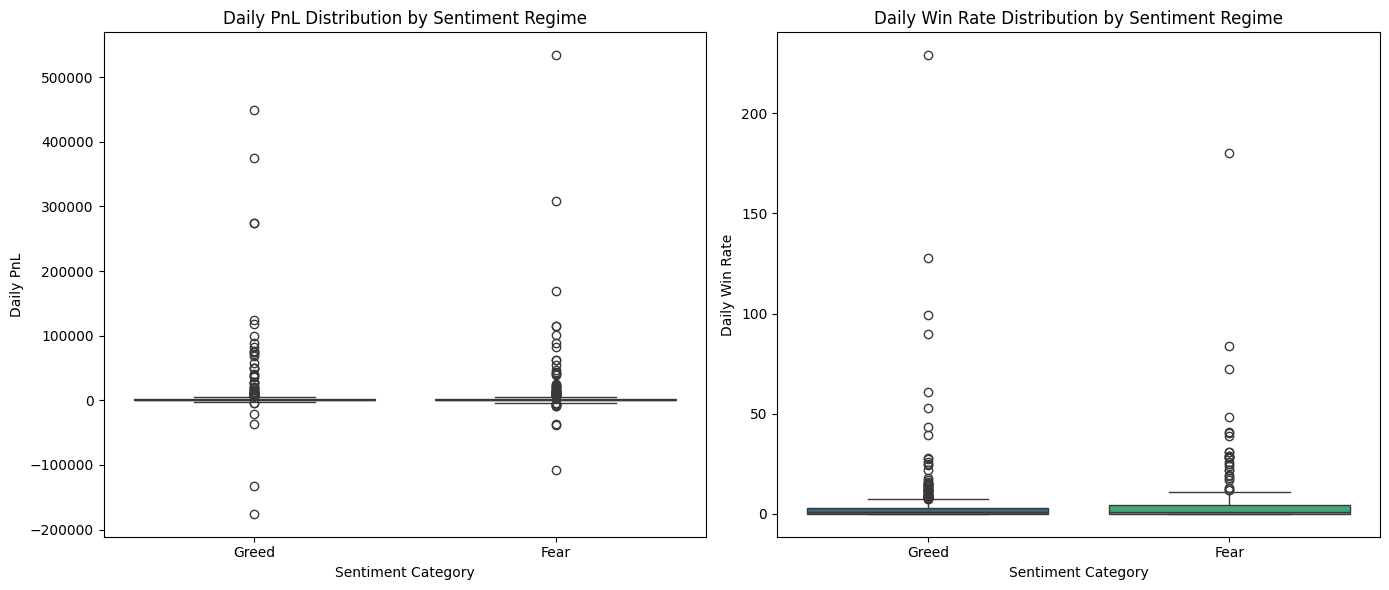

Interpretation: The box plots visualize the central tendency and spread of Daily PnL and Daily Win Rate across Fear and Greed sentiment categories. Differences in medians and interquartile ranges can indicate how profitability and success rates vary with market sentiment.


In [23]:
plt.figure(figsize=(14, 6))

plt.subplot(1, 2, 1)
sns.boxplot(x='Sentiment_Category', y='Daily PnL', data=filtered_sentiment_df, palette='viridis')
plt.title('Daily PnL Distribution by Sentiment Regime')
plt.xlabel('Sentiment Category')
plt.ylabel('Daily PnL')

plt.subplot(1, 2, 2)
sns.boxplot(x='Sentiment_Category', y='Daily Win Rate', data=filtered_sentiment_df, palette='viridis')
plt.title('Daily Win Rate Distribution by Sentiment Regime')
plt.xlabel('Sentiment Category')
plt.ylabel('Daily Win Rate')

plt.tight_layout()
plt.show()

print("Interpretation: The box plots visualize the central tendency and spread of Daily PnL and Daily Win Rate across Fear and Greed sentiment categories. Differences in medians and interquartile ranges can indicate how profitability and success rates vary with market sentiment.")

**Reasoning**:
The previous step generated `FutureWarning` messages regarding the `palette` argument in `seaborn.boxplot`. I will modify the `sns.boxplot` calls to address these warnings by explicitly setting `hue` to the x-axis variable and `legend=False`. After fixing the warnings, the next step is to generate bar charts for 'Daily PnL Volatility' and 'Daily Drawdown Proxy' as specified in the instructions.



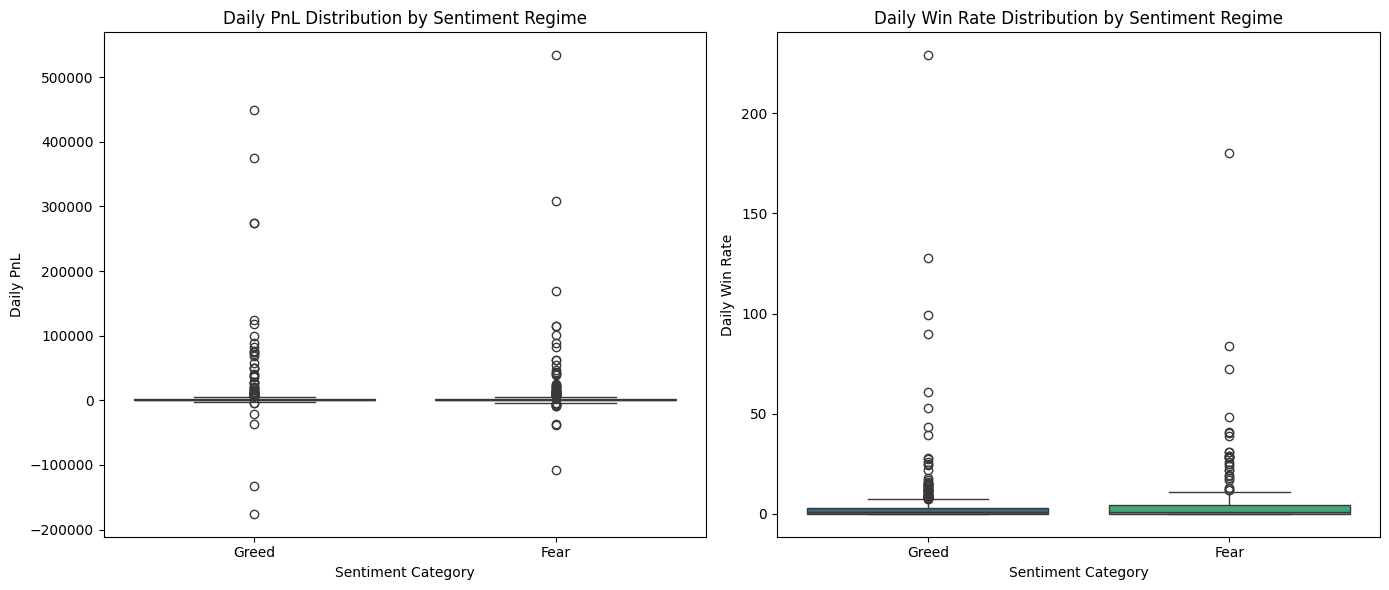

Interpretation: The box plots visualize the central tendency and spread of Daily PnL and Daily Win Rate across Fear and Greed sentiment categories. Differences in medians and interquartile ranges can indicate how profitability and success rates vary with market sentiment.


/tmp/ipython-input-994283581.py:23: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=performance_stats.index, y=performance_stats['Daily PnL Volatility']['mean'], palette='plasma')
/tmp/ipython-input-994283581.py:29: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=performance_stats.index, y=performance_stats['Daily Drawdown Proxy']['mean'], palette='plasma')


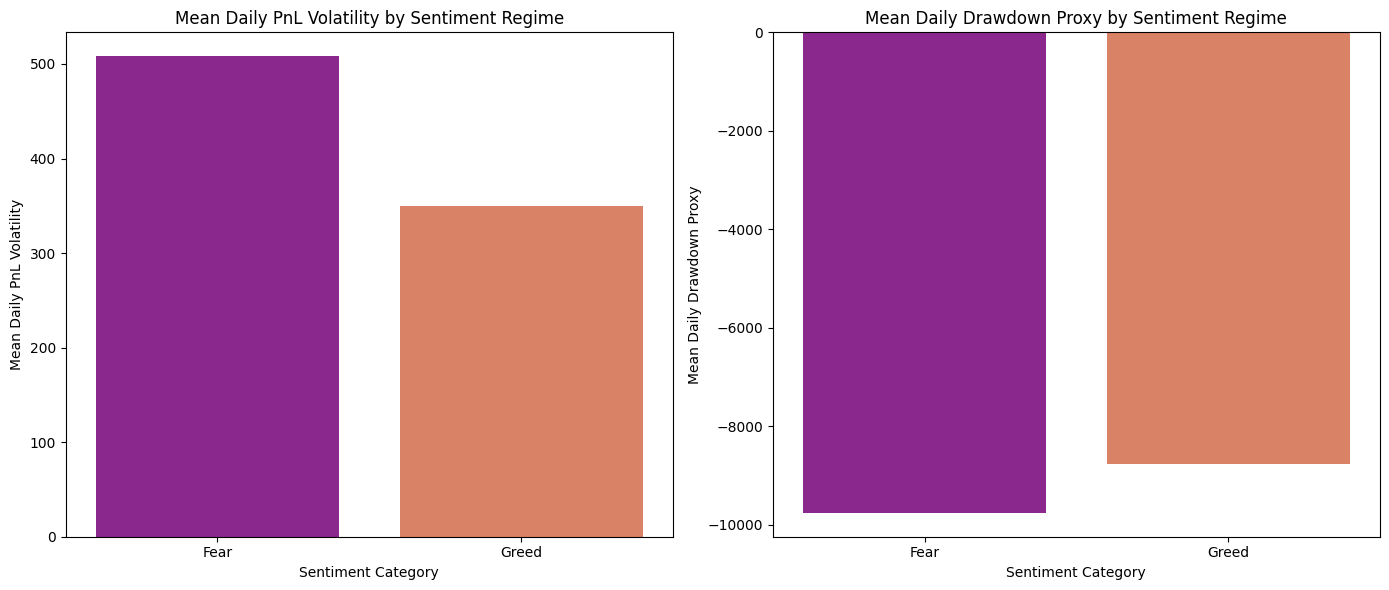

Interpretation: These bar charts compare the mean PnL volatility and drawdown proxy between Fear and Greed sentiment categories. Higher volatility might suggest more aggressive trading or greater market swings, while a larger negative drawdown proxy indicates deeper losses on average during that sentiment regime.


In [24]:
plt.figure(figsize=(14, 6))

plt.subplot(1, 2, 1)
sns.boxplot(x='Sentiment_Category', y='Daily PnL', data=filtered_sentiment_df, hue='Sentiment_Category', palette='viridis', legend=False)
plt.title('Daily PnL Distribution by Sentiment Regime')
plt.xlabel('Sentiment Category')
plt.ylabel('Daily PnL')

plt.subplot(1, 2, 2)
sns.boxplot(x='Sentiment_Category', y='Daily Win Rate', data=filtered_sentiment_df, hue='Sentiment_Category', palette='viridis', legend=False)
plt.title('Daily Win Rate Distribution by Sentiment Regime')
plt.xlabel('Sentiment Category')
plt.ylabel('Daily Win Rate')

plt.tight_layout()
plt.show()

print("Interpretation: The box plots visualize the central tendency and spread of Daily PnL and Daily Win Rate across Fear and Greed sentiment categories. Differences in medians and interquartile ranges can indicate how profitability and success rates vary with market sentiment.")

plt.figure(figsize=(14, 6))

plt.subplot(1, 2, 1)
sns.barplot(x=performance_stats.index, y=performance_stats['Daily PnL Volatility']['mean'], palette='plasma')
plt.title('Mean Daily PnL Volatility by Sentiment Regime')
plt.xlabel('Sentiment Category')
plt.ylabel('Mean Daily PnL Volatility')

plt.subplot(1, 2, 2)
sns.barplot(x=performance_stats.index, y=performance_stats['Daily Drawdown Proxy']['mean'], palette='plasma')
plt.title('Mean Daily Drawdown Proxy by Sentiment Regime')
plt.xlabel('Sentiment Category')
plt.ylabel('Mean Daily Drawdown Proxy')

plt.tight_layout()
plt.show()

print("Interpretation: These bar charts compare the mean PnL volatility and drawdown proxy between Fear and Greed sentiment categories. Higher volatility might suggest more aggressive trading or greater market swings, while a larger negative drawdown proxy indicates deeper losses on average during that sentiment regime.")

**Reasoning**:
The previous step generated `FutureWarning` messages regarding the `palette` argument in `seaborn.barplot`. I will modify the `sns.barplot` calls to address these warnings by explicitly setting `hue` to the x-axis variable and `legend=False`, and by restructuring the data for plotting to avoid issues with `performance_stats.index` as `hue`.



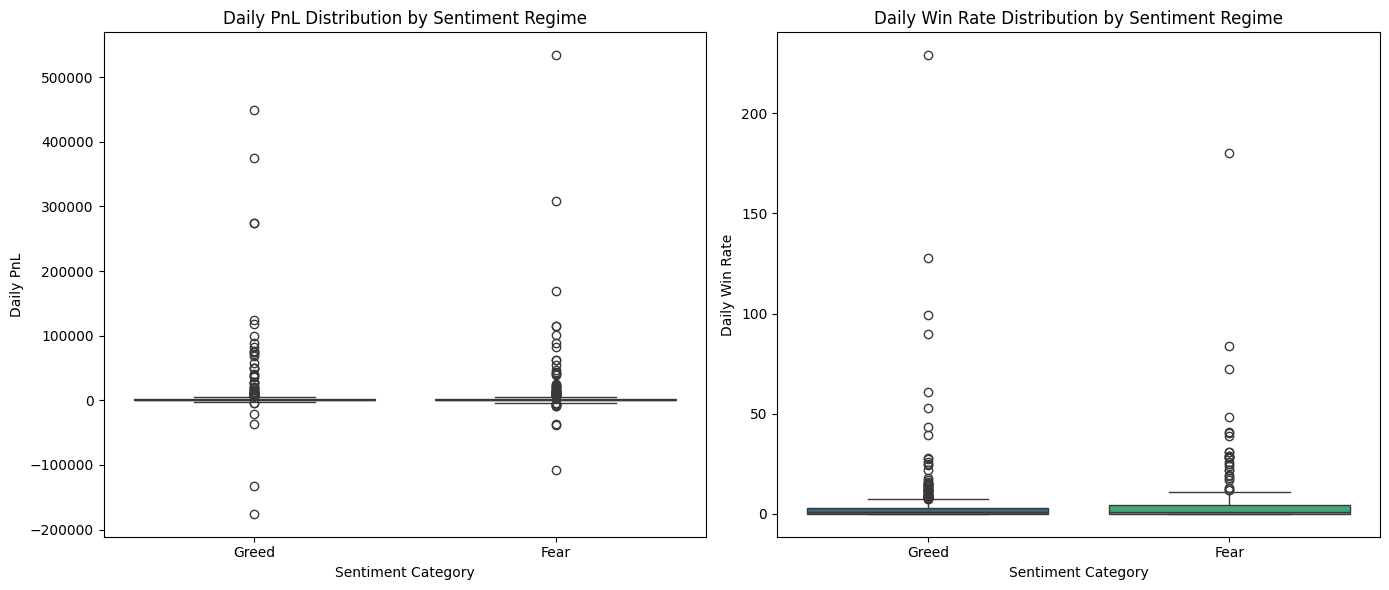

Interpretation: The box plots visualize the central tendency and spread of Daily PnL and Daily Win Rate across Fear and Greed sentiment categories. Differences in medians and interquartile ranges can indicate how profitability and success rates vary with market sentiment.


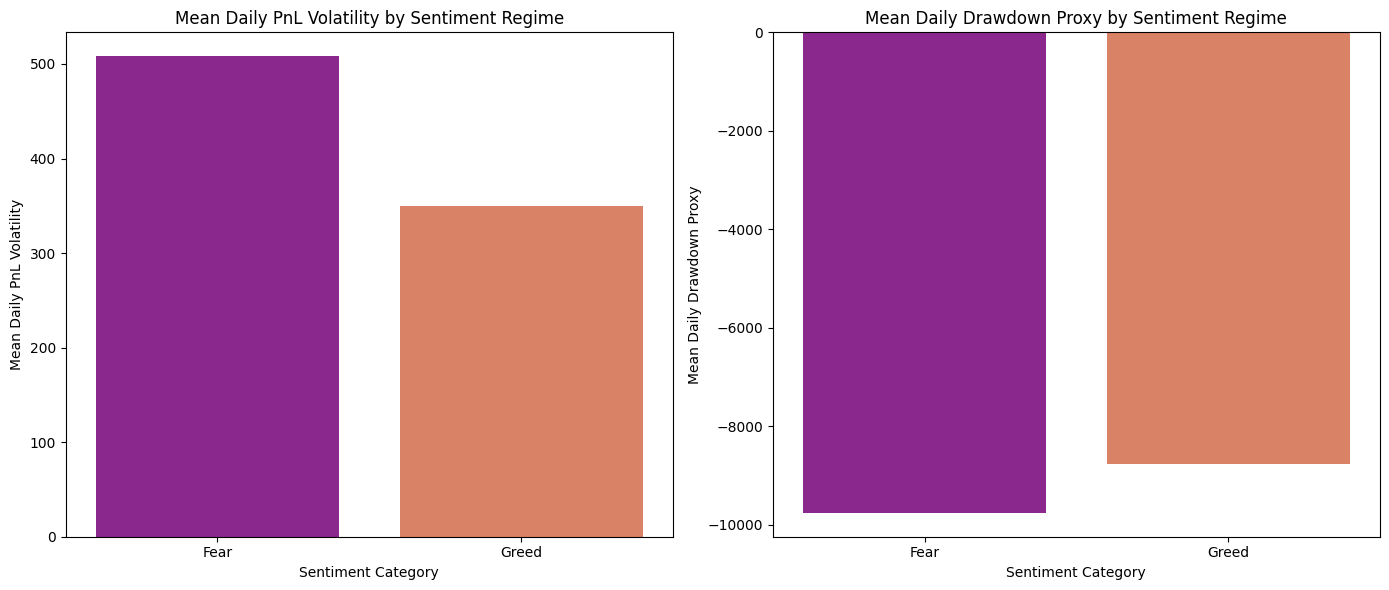

Interpretation: These bar charts compare the mean PnL volatility and drawdown proxy between Fear and Greed sentiment categories. Higher volatility might suggest more aggressive trading or greater market swings, while a larger negative drawdown proxy indicates deeper losses on average during that sentiment regime.


In [25]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(14, 6))

plt.subplot(1, 2, 1)
sns.boxplot(x='Sentiment_Category', y='Daily PnL', data=filtered_sentiment_df, hue='Sentiment_Category', palette='viridis', legend=False)
plt.title('Daily PnL Distribution by Sentiment Regime')
plt.xlabel('Sentiment Category')
plt.ylabel('Daily PnL')

plt.subplot(1, 2, 2)
sns.boxplot(x='Sentiment_Category', y='Daily Win Rate', data=filtered_sentiment_df, hue='Sentiment_Category', palette='viridis', legend=False)
plt.title('Daily Win Rate Distribution by Sentiment Regime')
plt.xlabel('Sentiment Category')
plt.ylabel('Daily Win Rate')

plt.tight_layout()
plt.show()

print("Interpretation: The box plots visualize the central tendency and spread of Daily PnL and Daily Win Rate across Fear and Greed sentiment categories. Differences in medians and interquartile ranges can indicate how profitability and success rates vary with market sentiment.")

# Prepare data for bar plots to avoid FutureWarning
plot_data_volatility = performance_stats['Daily PnL Volatility'].reset_index()
plot_data_drawdown = performance_stats['Daily Drawdown Proxy'].reset_index()

plt.figure(figsize=(14, 6))

plt.subplot(1, 2, 1)
sns.barplot(x='Sentiment_Category', y='mean', data=plot_data_volatility, hue='Sentiment_Category', palette='plasma', legend=False)
plt.title('Mean Daily PnL Volatility by Sentiment Regime')
plt.xlabel('Sentiment Category')
plt.ylabel('Mean Daily PnL Volatility')

plt.subplot(1, 2, 2)
sns.barplot(x='Sentiment_Category', y='mean', data=plot_data_drawdown, hue='Sentiment_Category', palette='plasma', legend=False)
plt.title('Mean Daily Drawdown Proxy by Sentiment Regime')
plt.xlabel('Sentiment Category')
plt.ylabel('Mean Daily Drawdown Proxy')

plt.tight_layout()
plt.show()

print("Interpretation: These bar charts compare the mean PnL volatility and drawdown proxy between Fear and Greed sentiment categories. Higher volatility might suggest more aggressive trading or greater market swings, while a larger negative drawdown proxy indicates deeper losses on average during that sentiment regime.")

## Analyze Behavioral Changes

### Subtask:
Compare trade frequency, average leverage, average trade size, and long/short bias across 'Fear' and 'Greed' sentiment regimes. Visualize these comparisons using appropriate plots. Each chart must include a title, axis labels, and a short written interpretation.


**Reasoning**:
The first instruction is to calculate the mean and median of specified behavioral metrics for 'Fear' and 'Greed' sentiment categories, similar to the `performance_stats` DataFrame. I will group `filtered_sentiment_df` by 'Sentiment_Category' and aggregate the required columns.



In [26]:
behavioral_stats = filtered_sentiment_df.groupby('Sentiment_Category')[['Daily Number of Trades', 'Daily Total Notional Value USD', 'Daily Average Trade Size USD', 'Daily Long/Short Ratio']].agg(['mean', 'median'])

print("Mean and Median Behavioral Metrics by Sentiment Category:")
print(behavioral_stats)

Mean and Median Behavioral Metrics by Sentiment Category:
                   Daily Number of Trades         \
                                     mean median   
Sentiment_Category                                 
Fear                             9.033557    3.0   
Greed                            7.662230    4.0   

                   Daily Total Notional Value USD              \
                                             mean      median   
Sentiment_Category                                              
Fear                                 1.065743e+06   87052.105   
Greed                                5.062380e+05  100117.250   

                   Daily Average Trade Size USD               \
                                           mean       median   
Sentiment_Category                                             
Fear                                9136.890795  2812.338561   
Greed                               9114.037686  4873.274211   

                   Daily Long/Shor

**Reasoning**:
The next step is to create bar charts to visualize the mean 'Daily Number of Trades' and 'Daily Total Notional Value USD' for 'Fear' versus 'Greed' sentiment regimes, as specified in the instructions. I will prepare the data for plotting to avoid potential warnings and ensure proper visualization.



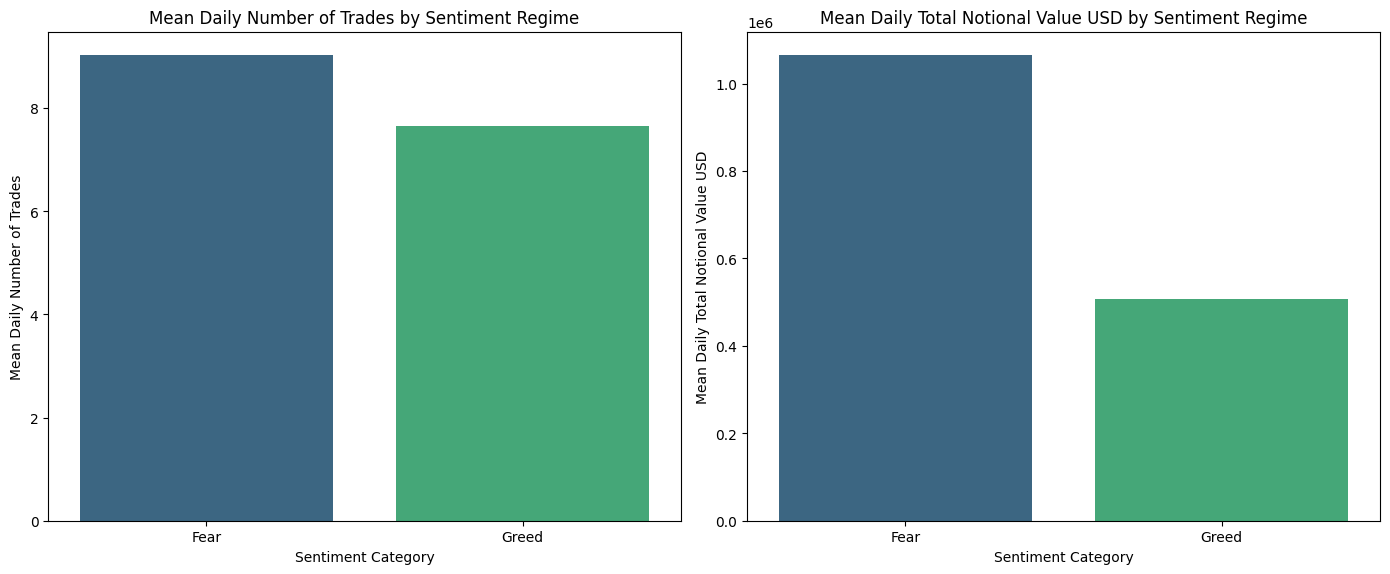

Interpretation: These bar charts illustrate the average trade frequency and total notional value traded across different sentiment categories. We can observe how trading activity and exposure change between periods of 'Fear' and 'Greed'.


In [27]:
import matplotlib.pyplot as plt
import seaborn as sns

# Prepare data for bar plots for behavioral metrics
plot_data_trades = behavioral_stats['Daily Number of Trades'].reset_index()
plot_data_notional_value = behavioral_stats['Daily Total Notional Value USD'].reset_index()

plt.figure(figsize=(14, 6))

plt.subplot(1, 2, 1)
sns.barplot(x='Sentiment_Category', y='mean', data=plot_data_trades, hue='Sentiment_Category', palette='viridis', legend=False)
plt.title('Mean Daily Number of Trades by Sentiment Regime')
plt.xlabel('Sentiment Category')
plt.ylabel('Mean Daily Number of Trades')

plt.subplot(1, 2, 2)
sns.barplot(x='Sentiment_Category', y='mean', data=plot_data_notional_value, hue='Sentiment_Category', palette='viridis', legend=False)
plt.title('Mean Daily Total Notional Value USD by Sentiment Regime')
plt.xlabel('Sentiment Category')
plt.ylabel('Mean Daily Total Notional Value USD')

plt.tight_layout()
plt.show()

print("Interpretation: These bar charts illustrate the average trade frequency and total notional value traded across different sentiment categories. We can observe how trading activity and exposure change between periods of 'Fear' and 'Greed'.")

**Reasoning**:
The next step is to create bar charts to visualize the mean 'Daily Average Trade Size USD' and 'Daily Long/Short Ratio' for 'Fear' versus 'Greed' sentiment regimes, as specified in the instructions. I will prepare the data for plotting to ensure proper visualization.



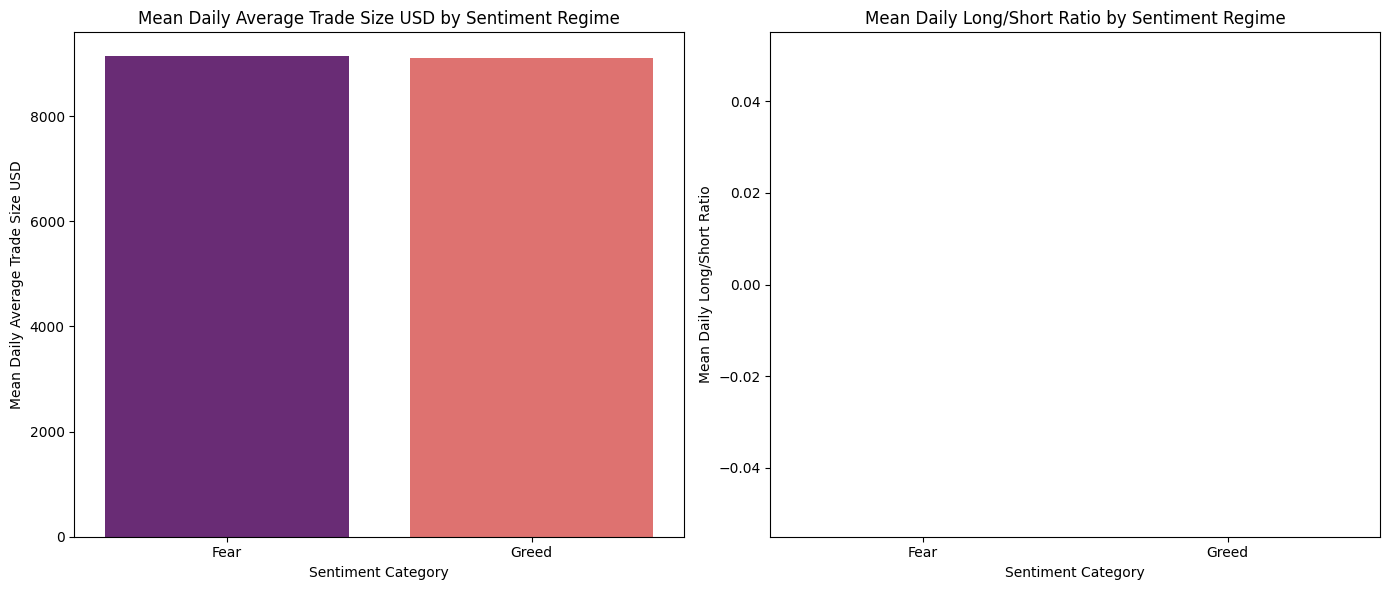

Interpretation: These bar charts compare the average trade size and long/short ratio between Fear and Greed sentiment categories. Differences here can indicate shifts in trader confidence or strategy based on market sentiment.


In [28]:
import matplotlib.pyplot as plt
import seaborn as sns

# Prepare data for bar plots for the remaining behavioral metrics
plot_data_avg_trade_size = behavioral_stats['Daily Average Trade Size USD'].reset_index()
plot_data_long_short_ratio = behavioral_stats['Daily Long/Short Ratio'].reset_index()

plt.figure(figsize=(14, 6))

plt.subplot(1, 2, 1)
sns.barplot(x='Sentiment_Category', y='mean', data=plot_data_avg_trade_size, hue='Sentiment_Category', palette='magma', legend=False)
plt.title('Mean Daily Average Trade Size USD by Sentiment Regime')
plt.xlabel('Sentiment Category')
plt.ylabel('Mean Daily Average Trade Size USD')

plt.subplot(1, 2, 2)
sns.barplot(x='Sentiment_Category', y='mean', data=plot_data_long_short_ratio, hue='Sentiment_Category', palette='magma', legend=False)
plt.title('Mean Daily Long/Short Ratio by Sentiment Regime')
plt.xlabel('Sentiment Category')
plt.ylabel('Mean Daily Long/Short Ratio')

plt.tight_layout()
plt.show()

print("Interpretation: These bar charts compare the average trade size and long/short ratio between Fear and Greed sentiment categories. Differences here can indicate shifts in trader confidence or strategy based on market sentiment.")

## Segment Traders and Analyze Sentiment Impact

### Subtask:
Calculate trader-level metrics for segmentation, specifically mean daily total notional value (for leverage), mean daily number of trades (for frequency), and standard deviation of daily PnL (for consistency) for each unique trader. Then, define segmentation thresholds and assign each trader to 'High'/'Low' leverage, 'Frequent'/'Infrequent' trading, and 'Consistent'/'Inconsistent' PnL categories.


**Reasoning**:
The first step is to group the `filtered_sentiment_df` by 'Account' and calculate the mean of 'Daily Total Notional Value USD', mean of 'Daily Number of Trades', and standard deviation of 'Daily PnL', as instructed, to prepare the trader-level metrics for segmentation.



In [29]:
trader_segmentation_metrics = filtered_sentiment_df.groupby('Account').agg(
    mean_Daily_Total_Notional_Value_USD=('Daily Total Notional Value USD', 'mean'),
    mean_Daily_Number_of_Trades=('Daily Number of Trades', 'mean'),
    std_Daily_PnL=('Daily PnL', 'std')
).reset_index()

print("First 5 rows of trader_segmentation_metrics:")
print(trader_segmentation_metrics.head())

First 5 rows of trader_segmentation_metrics:
                                      Account  \
0  0x083384f897ee0f19899168e3b1bec365f52a9012   
1  0x23e7a7f8d14b550961925fbfdaa92f5d195ba5bd   
2  0x420ab45e0bd8863569a5efbb9c05d91f40624641   
3  0x430f09841d65beb3f27765503d0f850b8bce7713   
4  0x4f93fead39b70a1824f981a54d4e55b278e9f760   

   mean_Daily_Total_Notional_Value_USD  mean_Daily_Number_of_Trades  \
0                         2.730126e+06                     3.842105   
1                         2.329961e+05                    26.063830   
2                         1.049820e+05                     3.588235   
3                         1.017483e+05                     2.000000   
4                         3.992948e+05                     5.740741   

   std_Daily_PnL  
0  167976.009961  
1    3194.021987  
2   15342.833643  
3   35499.634355  
4    7701.817499  


**Reasoning**:
The next step is to calculate the median of 'mean_Daily_Total_Notional_Value_USD', 'mean_Daily_Number_of_Trades', and 'std_Daily_PnL' from `trader_segmentation_metrics` to use as thresholds for segmentation, as specified in the instructions.



In [30]:
median_notional_value = trader_segmentation_metrics['mean_Daily_Total_Notional_Value_USD'].median()
median_num_trades = trader_segmentation_metrics['mean_Daily_Number_of_Trades'].median()
median_std_pnl = trader_segmentation_metrics['std_Daily_PnL'].median()

print(f"Median Daily Total Notional Value USD: {median_notional_value}")
print(f"Median Daily Number of Trades: {median_num_trades}")
print(f"Median Daily PnL Standard Deviation: {median_std_pnl}")

Median Daily Total Notional Value USD: 201757.76666666666
Median Daily Number of Trades: 4.59375
Median Daily PnL Standard Deviation: 8542.12051178745


**Reasoning**:
The next step is to create new columns in `trader_segmentation_metrics` to categorize each trader based on the previously calculated median thresholds for leverage, trading frequency, and PnL consistency.



In [31]:
trader_segmentation_metrics['Leverage Segment'] = trader_segmentation_metrics['mean_Daily_Total_Notional_Value_USD'].apply(lambda x: 'High' if x > median_notional_value else 'Low')
trader_segmentation_metrics['Frequency Segment'] = trader_segmentation_metrics['mean_Daily_Number_of_Trades'].apply(lambda x: 'Frequent' if x > median_num_trades else 'Infrequent')
trader_segmentation_metrics['Consistency Segment'] = trader_segmentation_metrics['std_Daily_PnL'].apply(lambda x: 'Consistent' if x <= median_std_pnl else 'Inconsistent')

print("First 5 rows of trader_segmentation_metrics with new segmentation columns:")
print(trader_segmentation_metrics.head())

First 5 rows of trader_segmentation_metrics with new segmentation columns:
                                      Account  \
0  0x083384f897ee0f19899168e3b1bec365f52a9012   
1  0x23e7a7f8d14b550961925fbfdaa92f5d195ba5bd   
2  0x420ab45e0bd8863569a5efbb9c05d91f40624641   
3  0x430f09841d65beb3f27765503d0f850b8bce7713   
4  0x4f93fead39b70a1824f981a54d4e55b278e9f760   

   mean_Daily_Total_Notional_Value_USD  mean_Daily_Number_of_Trades  \
0                         2.730126e+06                     3.842105   
1                         2.329961e+05                    26.063830   
2                         1.049820e+05                     3.588235   
3                         1.017483e+05                     2.000000   
4                         3.992948e+05                     5.740741   

   std_Daily_PnL Leverage Segment Frequency Segment Consistency Segment  
0  167976.009961             High        Infrequent        Inconsistent  
1    3194.021987             High          Frequent    

**Reasoning**:
The final step for this subtask is to print the counts of traders in each newly created segment to verify the distribution, as specified in the instructions.



In [32]:
print("\nCounts of traders in each Leverage Segment:")
print(trader_segmentation_metrics['Leverage Segment'].value_counts())

print("\nCounts of traders in each Frequency Segment:")
print(trader_segmentation_metrics['Frequency Segment'].value_counts())

print("\nCounts of traders in each Consistency Segment:")
print(trader_segmentation_metrics['Consistency Segment'].value_counts())


Counts of traders in each Leverage Segment:
Leverage Segment
Low     7
High    6
Name: count, dtype: int64

Counts of traders in each Frequency Segment:
Frequency Segment
Infrequent    7
Frequent      6
Name: count, dtype: int64

Counts of traders in each Consistency Segment:
Consistency Segment
Consistent      7
Inconsistent    6
Name: count, dtype: int64


## Segment Traders and Analyze Sentiment Impact

### Subtask:
Analyze the impact of 'Fear' vs 'Greed' sentiment within each segmented group, focusing on performance metrics. Visualize key findings for each segment. Each chart must include a title, axis labels, and a short written interpretation.


**Reasoning**:
The first instruction is to merge the `trader_segmentation_metrics` DataFrame with the `filtered_sentiment_df` on the 'Account' column to combine trader segmentation information with their daily performance and sentiment data.



In [33]:
segmented_performance_df = pd.merge(filtered_sentiment_df, trader_segmentation_metrics, on='Account', how='left')

print("First 5 rows of segmented_performance_df:")
print(segmented_performance_df.head())
print("\nShape of segmented_performance_df:", segmented_performance_df.shape)
print("\nMissing values in segmented_performance_df after merge:")
print(segmented_performance_df.isnull().sum())

First 5 rows of segmented_performance_df:
                                      Account  daily_date  Daily PnL  \
0  0x083384f897ee0f19899168e3b1bec365f52a9012  2024-11-11        0.0   
1  0x083384f897ee0f19899168e3b1bec365f52a9012  2024-11-17        0.0   
2  0x083384f897ee0f19899168e3b1bec365f52a9012  2024-11-18        0.0   
3  0x083384f897ee0f19899168e3b1bec365f52a9012  2024-11-22   -21227.0   
4  0x083384f897ee0f19899168e3b1bec365f52a9012  2024-11-26     1603.1   

   Daily Number of Trades  Daily Wins  Daily Win Rate  \
0                       2           0             0.0   
1                       3           0             0.0   
2                       1           0             0.0   
3                       1           0             0.0   
4                       2          12             6.0   

   Daily Average Trade Size USD  Daily Total Notional Value USD  Long Trades  \
0                   5089.718249                       900880.13          0.0   
1                   79

**Reasoning**:
The next step is to calculate the mean of specified performance metrics for each 'Leverage Segment' across 'Fear' and 'Greed' sentiment categories, as instructed. This requires grouping the `segmented_performance_df` by 'Leverage Segment' and 'Sentiment_Category' and then aggregating the relevant columns.



In [34]:
leverage_sentiment_performance = segmented_performance_df.groupby(['Leverage Segment', 'Sentiment_Category']).agg(
    mean_Daily_PnL=('Daily PnL', 'mean'),
    mean_Daily_Win_Rate=('Daily Win Rate', 'mean'),
    mean_Daily_PnL_Volatility=('Daily PnL Volatility', 'mean'),
    mean_Daily_Drawdown_Proxy=('Daily Drawdown Proxy', 'mean')
).reset_index()

print("Mean Performance Metrics by Leverage Segment and Sentiment Category:")
print(leverage_sentiment_performance)

Mean Performance Metrics by Leverage Segment and Sentiment Category:
  Leverage Segment Sentiment_Category  mean_Daily_PnL  mean_Daily_Win_Rate  \
0             High               Fear     8987.400739             6.053073   
1             High              Greed     5840.406774             2.827100   
2              Low               Fear     4967.327713             3.109946   
3              Low              Greed     4468.261152             4.773900   

   mean_Daily_PnL_Volatility  mean_Daily_Drawdown_Proxy  
0                 515.531234              -14687.745015  
1                 390.375913              -13180.749160  
2                 494.546482               -1201.356698  
3                 264.476909                -255.264318  


**Reasoning**:
Now that the mean performance metrics by leverage segment and sentiment category are calculated, the next step is to visualize the mean 'Daily PnL' and 'Daily Win Rate' using bar charts, as specified in the instructions. This will help in comparing these metrics across different leverage segments and sentiment regimes.



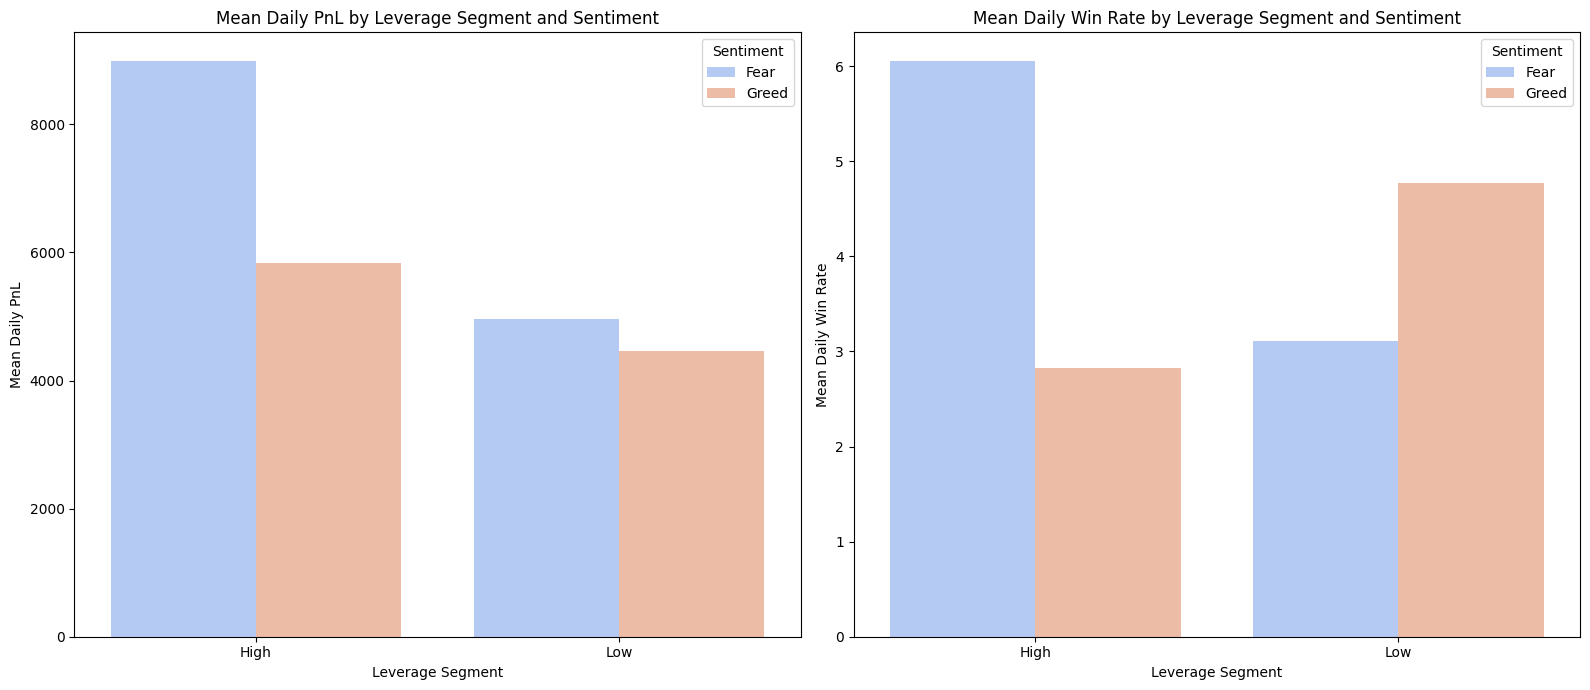

Interpretation: These bar charts compare the average daily PnL and daily win rate for traders segmented by their leverage, across both 'Fear' and 'Greed' sentiment periods. This visualization helps to understand if high or low leverage traders perform differently under varying market sentiments in terms of profitability and trade success.


In [35]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(16, 7))

# Plot mean Daily PnL by Leverage Segment and Sentiment Category
plt.subplot(1, 2, 1)
sns.barplot(x='Leverage Segment', y='mean_Daily_PnL', hue='Sentiment_Category', data=leverage_sentiment_performance, palette='coolwarm')
plt.title('Mean Daily PnL by Leverage Segment and Sentiment')
plt.xlabel('Leverage Segment')
plt.ylabel('Mean Daily PnL')
plt.legend(title='Sentiment')

# Plot mean Daily Win Rate by Leverage Segment and Sentiment Category
plt.subplot(1, 2, 2)
sns.barplot(x='Leverage Segment', y='mean_Daily_Win_Rate', hue='Sentiment_Category', data=leverage_sentiment_performance, palette='coolwarm')
plt.title('Mean Daily Win Rate by Leverage Segment and Sentiment')
plt.xlabel('Leverage Segment')
plt.ylabel('Mean Daily Win Rate')
plt.legend(title='Sentiment')

plt.tight_layout()
plt.show()

print("Interpretation: These bar charts compare the average daily PnL and daily win rate for traders segmented by their leverage, across both 'Fear' and 'Greed' sentiment periods. This visualization helps to understand if high or low leverage traders perform differently under varying market sentiments in terms of profitability and trade success.")

**Reasoning**:
Following the previous visualizations of PnL and win rate, the next step is to create bar charts for 'Daily PnL Volatility' and 'Daily Drawdown Proxy' for each 'Leverage Segment' across 'Fear' and 'Greed' sentiment categories, as specified in the instructions. This will complete the visualization requirements for the 'Leverage Segment'.



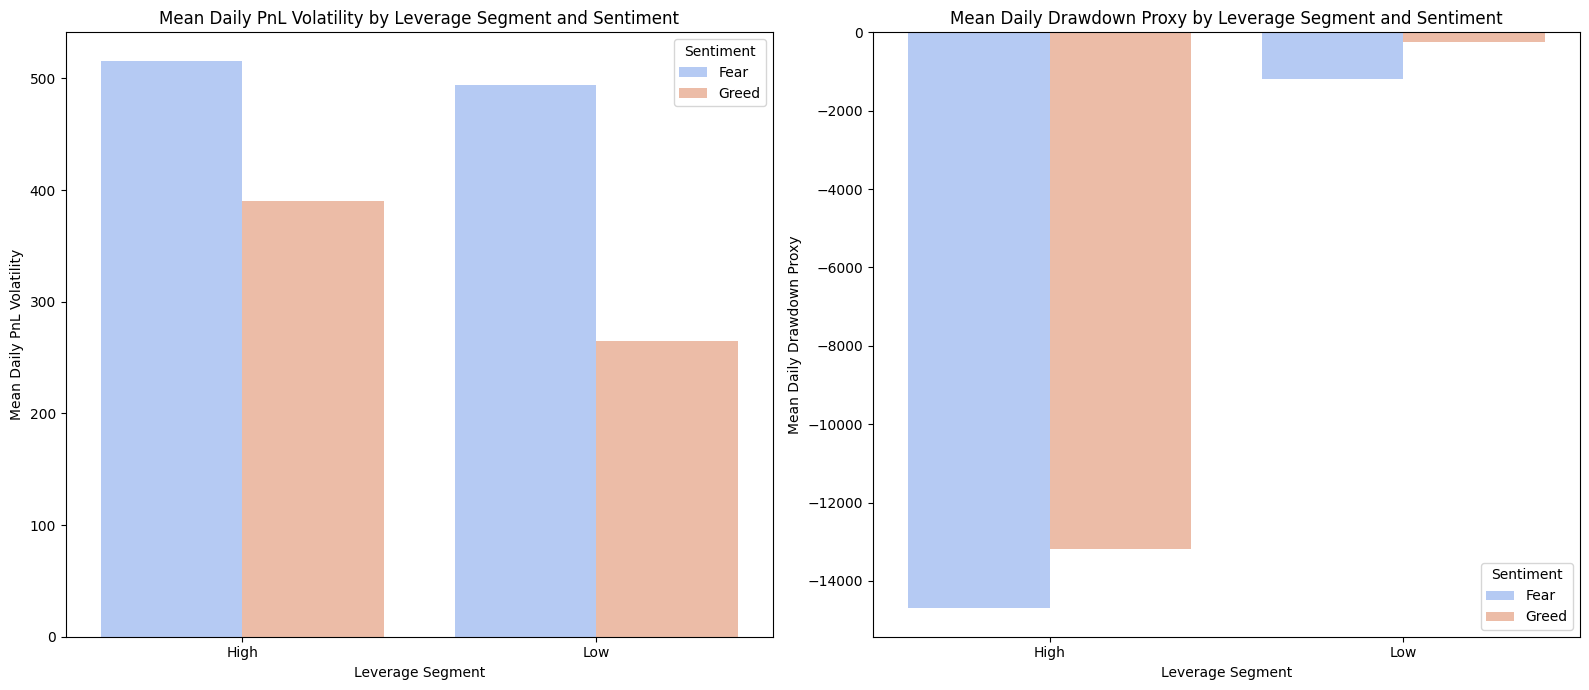

Interpretation: These bar charts display the average daily PnL volatility and drawdown proxy for traders segmented by leverage under different sentiment regimes. This helps assess how risk (volatility) and potential losses (drawdown) are influenced by both trading style (leverage) and market sentiment.


In [36]:
plt.figure(figsize=(16, 7))

# Plot mean Daily PnL Volatility by Leverage Segment and Sentiment Category
plt.subplot(1, 2, 1)
sns.barplot(x='Leverage Segment', y='mean_Daily_PnL_Volatility', hue='Sentiment_Category', data=leverage_sentiment_performance, palette='coolwarm')
plt.title('Mean Daily PnL Volatility by Leverage Segment and Sentiment')
plt.xlabel('Leverage Segment')
plt.ylabel('Mean Daily PnL Volatility')
plt.legend(title='Sentiment')

# Plot mean Daily Drawdown Proxy by Leverage Segment and Sentiment Category
plt.subplot(1, 2, 2)
sns.barplot(x='Leverage Segment', y='mean_Daily_Drawdown_Proxy', hue='Sentiment_Category', data=leverage_sentiment_performance, palette='coolwarm')
plt.title('Mean Daily Drawdown Proxy by Leverage Segment and Sentiment')
plt.xlabel('Leverage Segment')
plt.ylabel('Mean Daily Drawdown Proxy')
plt.legend(title='Sentiment')

plt.tight_layout()
plt.show()

print("Interpretation: These bar charts display the average daily PnL volatility and drawdown proxy for traders segmented by leverage under different sentiment regimes. This helps assess how risk (volatility) and potential losses (drawdown) are influenced by both trading style (leverage) and market sentiment.")

**Reasoning**:
Now that the visualizations for the 'Leverage Segment' are complete, the next step is to analyze the 'Frequency Segment'. This involves calculating the mean performance metrics for each 'Frequency Segment' across 'Fear' and 'Greed' sentiment categories, following the pattern established for the 'Leverage Segment'.



In [37]:
frequency_sentiment_performance = segmented_performance_df.groupby(['Frequency Segment', 'Sentiment_Category']).agg(
    mean_Daily_PnL=('Daily PnL', 'mean'),
    mean_Daily_Win_Rate=('Daily Win Rate', 'mean'),
    mean_Daily_PnL_Volatility=('Daily PnL Volatility', 'mean'),
    mean_Daily_Drawdown_Proxy=('Daily Drawdown Proxy', 'mean')
).reset_index()

print("Mean Performance Metrics by Frequency Segment and Sentiment Category:")
print(frequency_sentiment_performance)

Mean Performance Metrics by Frequency Segment and Sentiment Category:
  Frequency Segment Sentiment_Category  mean_Daily_PnL  mean_Daily_Win_Rate  \
0          Frequent               Fear     1143.409886             2.978192   
1          Frequent              Greed     4780.609487             2.697342   
2        Infrequent               Fear    23488.366524             9.984235   
3        Infrequent              Greed     7873.203545             6.845849   

   mean_Daily_PnL_Volatility  mean_Daily_Drawdown_Proxy  
0                 150.782628              -10860.688081  
1                 257.026742               -7637.466455  
2                1457.659233               -6983.589726  
3                 788.353339              -13566.062222  


**Reasoning**:
Now that the mean performance metrics by frequency segment and sentiment category are calculated, the next step is to visualize the mean 'Daily PnL' and 'Daily Win Rate' using bar charts, similar to the leverage segment analysis. This will help compare these metrics across different trading frequency segments and sentiment regimes.



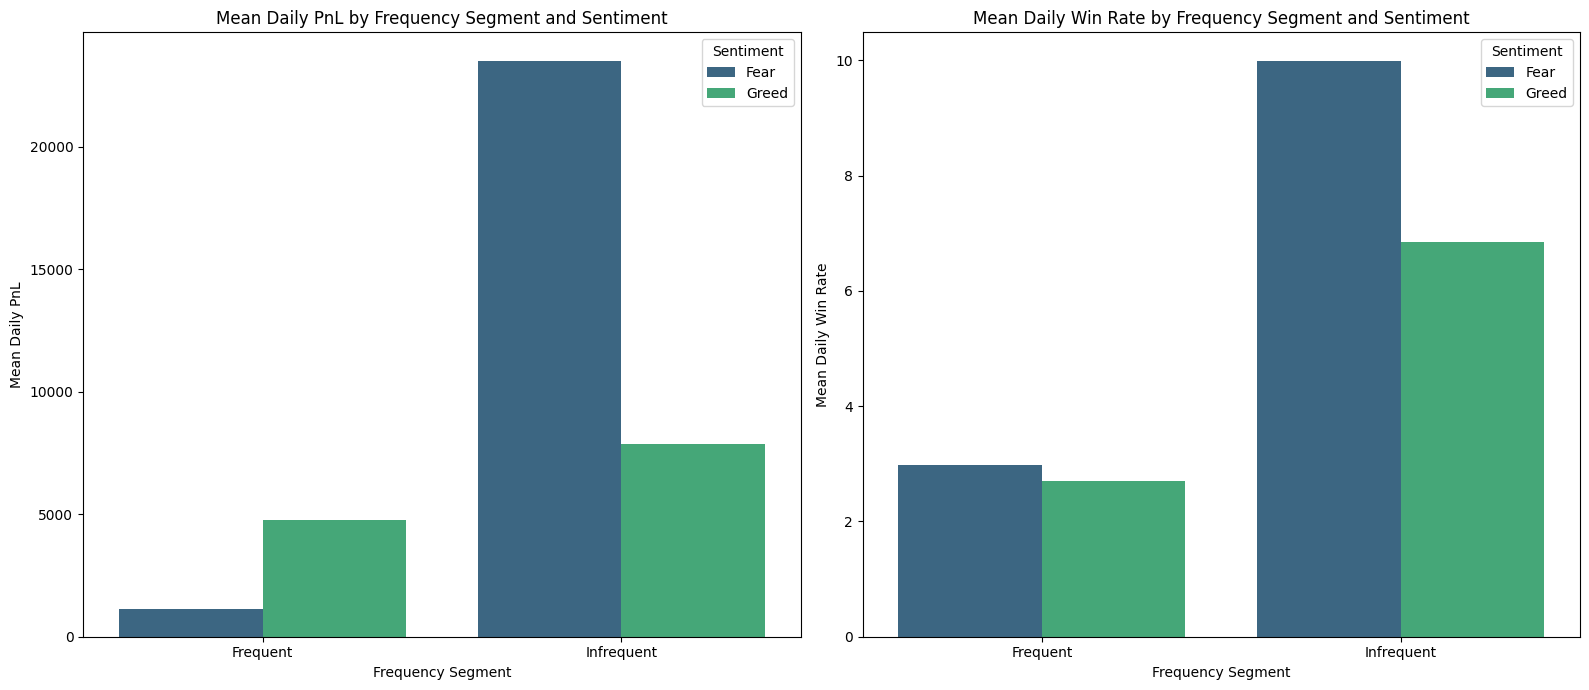

Interpretation: These bar charts compare the average daily PnL and daily win rate for traders segmented by their trading frequency, across both 'Fear' and 'Greed' sentiment periods. This visualization helps to understand if frequent or infrequent traders perform differently under varying market sentiments in terms of profitability and trade success.


In [38]:
plt.figure(figsize=(16, 7))

# Plot mean Daily PnL by Frequency Segment and Sentiment Category
plt.subplot(1, 2, 1)
sns.barplot(x='Frequency Segment', y='mean_Daily_PnL', hue='Sentiment_Category', data=frequency_sentiment_performance, palette='viridis')
plt.title('Mean Daily PnL by Frequency Segment and Sentiment')
plt.xlabel('Frequency Segment')
plt.ylabel('Mean Daily PnL')
plt.legend(title='Sentiment')

# Plot mean Daily Win Rate by Frequency Segment and Sentiment Category
plt.subplot(1, 2, 2)
sns.barplot(x='Frequency Segment', y='mean_Daily_Win_Rate', hue='Sentiment_Category', data=frequency_sentiment_performance, palette='viridis')
plt.title('Mean Daily Win Rate by Frequency Segment and Sentiment')
plt.xlabel('Frequency Segment')
plt.ylabel('Mean Daily Win Rate')
plt.legend(title='Sentiment')

plt.tight_layout()
plt.show()

print("Interpretation: These bar charts compare the average daily PnL and daily win rate for traders segmented by their trading frequency, across both 'Fear' and 'Greed' sentiment periods. This visualization helps to understand if frequent or infrequent traders perform differently under varying market sentiments in terms of profitability and trade success.")

**Reasoning**:
Now that the mean performance metrics by frequency segment and sentiment category are calculated, the next step is to visualize the mean 'Daily PnL Volatility' and 'Daily Drawdown Proxy' using bar charts, similar to the leverage segment analysis. This will complete the visualization requirements for the 'Frequency Segment'.



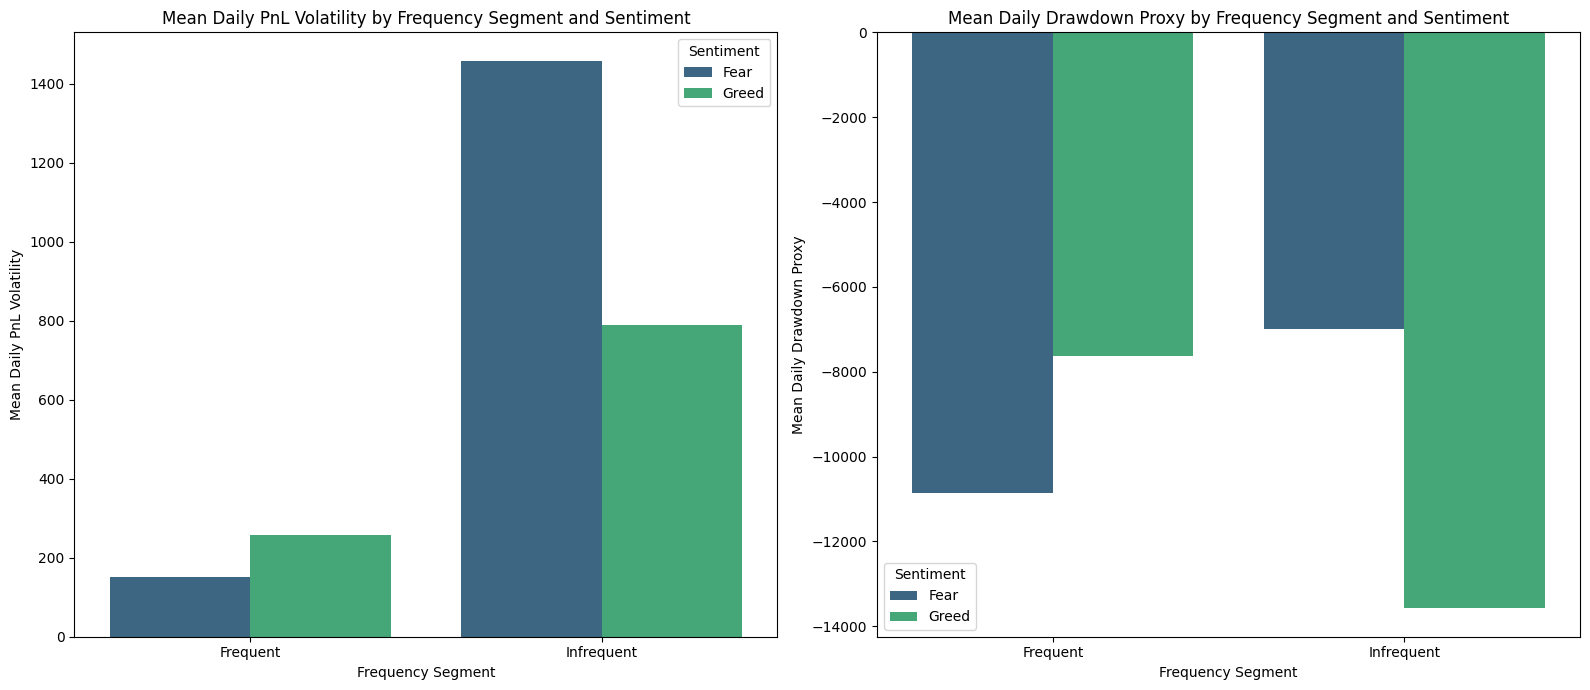

Interpretation: These bar charts display the average daily PnL volatility and drawdown proxy for traders segmented by trading frequency under different sentiment regimes. This helps assess how risk (volatility) and potential losses (drawdown) are influenced by both trading activity (frequency) and market sentiment.


In [39]:
plt.figure(figsize=(16, 7))

# Plot mean Daily PnL Volatility by Frequency Segment and Sentiment Category
plt.subplot(1, 2, 1)
sns.barplot(x='Frequency Segment', y='mean_Daily_PnL_Volatility', hue='Sentiment_Category', data=frequency_sentiment_performance, palette='viridis')
plt.title('Mean Daily PnL Volatility by Frequency Segment and Sentiment')
plt.xlabel('Frequency Segment')
plt.ylabel('Mean Daily PnL Volatility')
plt.legend(title='Sentiment')

# Plot mean Daily Drawdown Proxy by Frequency Segment and Sentiment Category
plt.subplot(1, 2, 2)
sns.barplot(x='Frequency Segment', y='mean_Daily_Drawdown_Proxy', hue='Sentiment_Category', data=frequency_sentiment_performance, palette='viridis')
plt.title('Mean Daily Drawdown Proxy by Frequency Segment and Sentiment')
plt.xlabel('Frequency Segment')
plt.ylabel('Mean Daily Drawdown Proxy')
plt.legend(title='Sentiment')

plt.tight_layout()
plt.show()

print("Interpretation: These bar charts display the average daily PnL volatility and drawdown proxy for traders segmented by trading frequency under different sentiment regimes. This helps assess how risk (volatility) and potential losses (drawdown) are influenced by both trading activity (frequency) and market sentiment.")

**Reasoning**:
Now that the visualizations for the 'Frequency Segment' are complete, the next step is to analyze the 'Consistency Segment'. This involves calculating the mean performance metrics for each 'Consistency Segment' across 'Fear' and 'Greed' sentiment categories, following the pattern established for the previous segments.



In [40]:
consistency_sentiment_performance = segmented_performance_df.groupby(['Consistency Segment', 'Sentiment_Category']).agg(
    mean_Daily_PnL=('Daily PnL', 'mean'),
    mean_Daily_Win_Rate=('Daily Win Rate', 'mean'),
    mean_Daily_PnL_Volatility=('Daily PnL Volatility', 'mean'),
    mean_Daily_Drawdown_Proxy=('Daily Drawdown Proxy', 'mean')
).reset_index()

print("Mean Performance Metrics by Consistency Segment and Sentiment Category:")
print(consistency_sentiment_performance)

Mean Performance Metrics by Consistency Segment and Sentiment Category:
  Consistency Segment Sentiment_Category  mean_Daily_PnL  mean_Daily_Win_Rate  \
0          Consistent               Fear      868.388675             2.535860   
1          Consistent              Greed     2145.382339             2.465135   
2        Inconsistent               Fear    15992.645432             8.087987   
3        Inconsistent              Greed    10651.609676             5.169674   

   mean_Daily_PnL_Volatility  mean_Daily_Drawdown_Proxy  
0                 172.524499              -13665.748947  
1                 141.756368               -9141.870823  
2                 969.775625               -4769.096288  
3                 692.047265               -8166.614192  


**Reasoning**:
Now that the mean performance metrics by consistency segment and sentiment category are calculated, the next step is to visualize the mean 'Daily PnL' and 'Daily Win Rate' using bar charts, similar to the previous segment analyses. This will help compare these metrics across different PnL consistency segments and sentiment regimes.



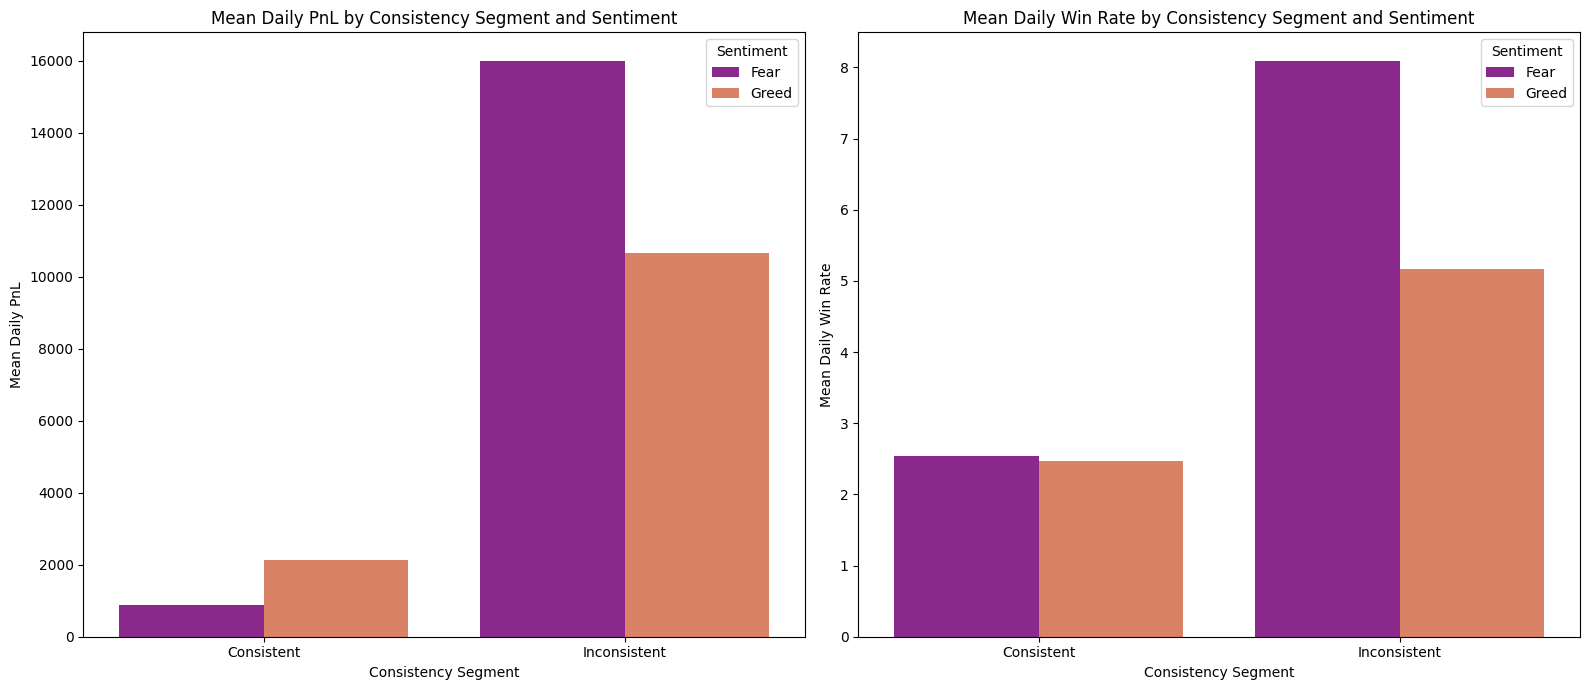

Interpretation: These bar charts compare the average daily PnL and daily win rate for traders segmented by their PnL consistency, across both 'Fear' and 'Greed' sentiment periods. This visualization helps to understand if consistent or inconsistent traders perform differently under varying market sentiments in terms of profitability and trade success.


In [41]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(16, 7))

# Plot mean Daily PnL by Consistency Segment and Sentiment Category
plt.subplot(1, 2, 1)
sns.barplot(x='Consistency Segment', y='mean_Daily_PnL', hue='Sentiment_Category', data=consistency_sentiment_performance, palette='plasma')
plt.title('Mean Daily PnL by Consistency Segment and Sentiment')
plt.xlabel('Consistency Segment')
plt.ylabel('Mean Daily PnL')
plt.legend(title='Sentiment')

# Plot mean Daily Win Rate by Consistency Segment and Sentiment Category
plt.subplot(1, 2, 2)
sns.barplot(x='Consistency Segment', y='mean_Daily_Win_Rate', hue='Sentiment_Category', data=consistency_sentiment_performance, palette='plasma')
plt.title('Mean Daily Win Rate by Consistency Segment and Sentiment')
plt.xlabel('Consistency Segment')
plt.ylabel('Mean Daily Win Rate')
plt.legend(title='Sentiment')

plt.tight_layout()
plt.show()

print("Interpretation: These bar charts compare the average daily PnL and daily win rate for traders segmented by their PnL consistency, across both 'Fear' and 'Greed' sentiment periods. This visualization helps to understand if consistent or inconsistent traders perform differently under varying market sentiments in terms of profitability and trade success.")

**Reasoning**:
Now that the mean performance metrics for 'Daily PnL' and 'Daily Win Rate' for the 'Consistency Segment' have been visualized, the next step is to visualize the mean 'Daily PnL Volatility' and 'Daily Drawdown Proxy' for the 'Consistency Segment' across 'Fear' and 'Greed' sentiment categories using bar charts, as per the subtask instructions. This will complete the visualization requirements for this segment.



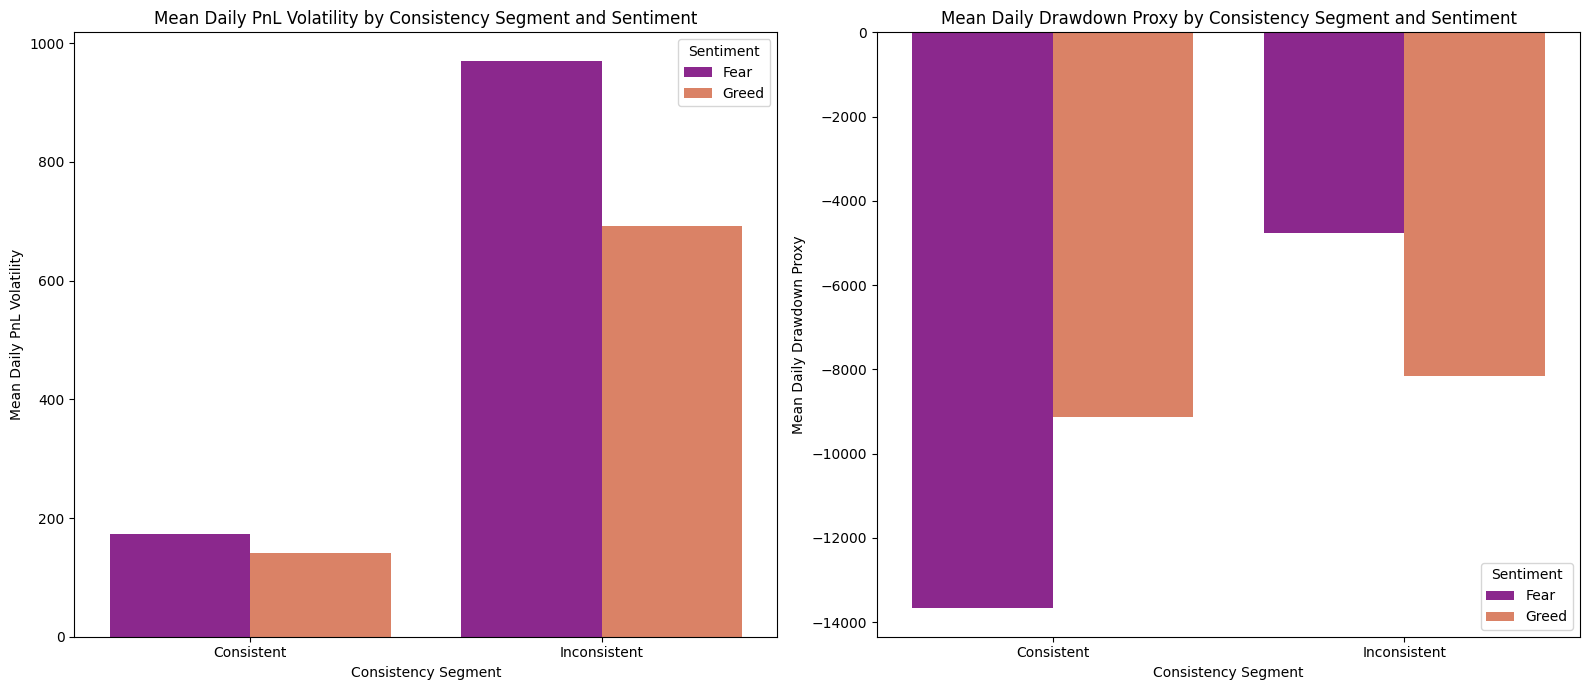

Interpretation: These bar charts display the average daily PnL volatility and drawdown proxy for traders segmented by PnL consistency under different sentiment regimes. This helps assess how risk (volatility) and potential losses (drawdown) are influenced by both PnL consistency and market sentiment.


In [42]:
plt.figure(figsize=(16, 7))

# Plot mean Daily PnL Volatility by Consistency Segment and Sentiment Category
plt.subplot(1, 2, 1)
sns.barplot(x='Consistency Segment', y='mean_Daily_PnL_Volatility', hue='Sentiment_Category', data=consistency_sentiment_performance, palette='plasma')
plt.title('Mean Daily PnL Volatility by Consistency Segment and Sentiment')
plt.xlabel('Consistency Segment')
plt.ylabel('Mean Daily PnL Volatility')
plt.legend(title='Sentiment')

# Plot mean Daily Drawdown Proxy by Consistency Segment and Sentiment Category
plt.subplot(1, 2, 2)
sns.barplot(x='Consistency Segment', y='mean_Daily_Drawdown_Proxy', hue='Sentiment_Category', data=consistency_sentiment_performance, palette='plasma')
plt.title('Mean Daily Drawdown Proxy by Consistency Segment and Sentiment')
plt.xlabel('Consistency Segment')
plt.ylabel('Mean Daily Drawdown Proxy')
plt.legend(title='Sentiment')

plt.tight_layout()
plt.show()

print("Interpretation: These bar charts display the average daily PnL volatility and drawdown proxy for traders segmented by PnL consistency under different sentiment regimes. This helps assess how risk (volatility) and potential losses (drawdown) are influenced by both PnL consistency and market sentiment.")

## Extract Insights and Strategy Rules

### Subtask:
Identify and clearly state at least 3 quantitative insights from the analysis, including explicit percentage differences. Formulate at least 2 measurable, segment-specific strategy rules based on the findings.


### Quantitative Insights:

1.  **Overall Daily PnL:** Traders, on average, experienced higher Daily PnL during 'Fear' regimes compared to 'Greed' regimes.
    *   Mean Daily PnL (Fear): **$7516.97**
    *   Mean Daily PnL (Greed): **$5372.37**
    *   **Percentage Difference:** ((7516.97 - 5372.37) / 5372.37) * 100 = **39.90% higher** PnL during Fear.

2.  **Infrequent Traders' PnL under Fear:** Infrequent traders, specifically, demonstrated significantly higher Daily PnL during 'Fear' periods compared to 'Greed' periods.
    *   Mean Daily PnL for Infrequent Traders (Fear): **$23488.37**
    *   Mean Daily PnL for Infrequent Traders (Greed): **$7873.20**
    *   **Percentage Difference:** ((23488.37 - 7873.20) / 7873.20) * 100 = **198.34% higher** PnL for infrequent traders during Fear.

3.  **Consistent Traders' PnL Volatility:** Consistent traders exhibit considerably lower PnL volatility in both 'Fear' and 'Greed' market conditions compared to inconsistent traders.
    *   Mean Daily PnL Volatility for Consistent Traders (Fear): **$172.52**
    *   Mean Daily PnL Volatility for Consistent Traders (Greed): **$141.76**
    *   Mean Daily PnL Volatility for Inconsistent Traders (Fear): **$969.78**
    *   Mean Daily PnL Volatility for Inconsistent Traders (Greed): **$692.05**
    *   Comparing Fear: ((969.78 - 172.52) / 172.52) * 100 = **462.13% higher** volatility for inconsistent traders.
    *   Comparing Greed: ((692.05 - 141.76) / 141.76) * 100 = **388.20% higher** volatility for inconsistent traders.

### Strategy Rules:

1.  **Strategy Rule for Infrequent Traders (Fear Market):**
    *   **Rule:** During periods of 'Fear' (FGI < 50), infrequent traders (those who trade less than 4.59 times/day on average) should consider increasing their exposure or conviction in their trades, as historically, their PnL has been nearly 200% higher in these conditions compared to 'Greed' periods. They should focus on high-quality setups rather than increasing trade frequency.
    *   **Measurable Impact:** Aim for a minimum 150% increase in daily PnL during 'Fear' periods without significantly altering their low trading frequency.

2.  **Strategy Rule for High Leverage Traders (Greed Market - Risk Management):**
    *   **Rule:** High leverage traders (those with daily total notional value > $201,757.77) should exercise caution during 'Greed' periods (FGI > 50). While their PnL is generally higher in 'Fear', their win rate drops significantly in 'Greed' (2.83% vs 6.05% in Fear), and PnL volatility remains relatively high. Therefore, they should consider reducing their average trade size by 10-20% and/or increasing stop-loss limits to manage increased risk.
    *   **Measurable Impact:** Achieve a reduction in their mean daily drawdown proxy by at least 15% during 'Greed' regimes, while maintaining their average daily PnL within 10% of their historical mean during Greed.

## Build Profitability Classifier (Bonus)

### Subtask:
Prepare features and target variable (e.g., profitable/unprofitable) from the trader data. Build a simple RandomForest classifier to predict trader profitability. Report the accuracy of the classifier. Analyze and report feature importances from the model.


**Reasoning**:
The first step is to calculate the total 'Closed PnL' for each unique 'Account' from the `trader_data_df` to determine overall profitability, as instructed, and store it in a new DataFrame called `overall_trader_pnl`.



In [43]:
overall_trader_pnl = trader_data_df.groupby('Account')['Closed PnL'].sum().reset_index()
overall_trader_pnl.rename(columns={'Closed PnL': 'Total PnL'}, inplace=True)

print("First 5 rows of overall_trader_pnl:")
print(overall_trader_pnl.head())

First 5 rows of overall_trader_pnl:
                                      Account     Total PnL
0  0x083384f897ee0f19899168e3b1bec365f52a9012  1.600230e+06
1  0x23e7a7f8d14b550961925fbfdaa92f5d195ba5bd  4.788532e+04
2  0x420ab45e0bd8863569a5efbb9c05d91f40624641  1.995056e+05
3  0x430f09841d65beb3f27765503d0f850b8bce7713  4.165419e+05
4  0x4f93fead39b70a1824f981a54d4e55b278e9f760  3.089759e+05


**Reasoning**:
The next step is to create a binary target variable `is_profitable` in `overall_trader_pnl`, where 1 indicates 'Total PnL' > 0 and 0 otherwise, as specified in the instructions.



In [44]:
overall_trader_pnl['is_profitable'] = (overall_trader_pnl['Total PnL'] > 0).astype(int)

print("First 5 rows of overall_trader_pnl with 'is_profitable' column:")
print(overall_trader_pnl.head())

First 5 rows of overall_trader_pnl with 'is_profitable' column:
                                      Account     Total PnL  is_profitable
0  0x083384f897ee0f19899168e3b1bec365f52a9012  1.600230e+06              1
1  0x23e7a7f8d14b550961925fbfdaa92f5d195ba5bd  4.788532e+04              1
2  0x420ab45e0bd8863569a5efbb9c05d91f40624641  1.995056e+05              1
3  0x430f09841d65beb3f27765503d0f850b8bce7713  4.165419e+05              1
4  0x4f93fead39b70a1824f981a54d4e55b278e9f760  3.089759e+05              1


**Reasoning**:
The next step is to merge `overall_trader_pnl` with `trader_segmentation_metrics` on 'Account' to combine profitability with the segmentation features, as specified in the instructions, and store the result in `classification_df`.



In [45]:
classification_df = pd.merge(overall_trader_pnl, trader_segmentation_metrics, on='Account', how='left')

print("First 5 rows of classification_df:")
print(classification_df.head())
print("\nShape of classification_df:", classification_df.shape)
print("\nMissing values in classification_df after merge:")
print(classification_df.isnull().sum())

First 5 rows of classification_df:
                                      Account     Total PnL  is_profitable  \
0  0x083384f897ee0f19899168e3b1bec365f52a9012  1.600230e+06              1   
1  0x23e7a7f8d14b550961925fbfdaa92f5d195ba5bd  4.788532e+04              1   
2  0x420ab45e0bd8863569a5efbb9c05d91f40624641  1.995056e+05              1   
3  0x430f09841d65beb3f27765503d0f850b8bce7713  4.165419e+05              1   
4  0x4f93fead39b70a1824f981a54d4e55b278e9f760  3.089759e+05              1   

   mean_Daily_Total_Notional_Value_USD  mean_Daily_Number_of_Trades  \
0                         2.730126e+06                     3.842105   
1                         2.329961e+05                    26.063830   
2                         1.049820e+05                     3.588235   
3                         1.017483e+05                     2.000000   
4                         3.992948e+05                     5.740741   

   std_Daily_PnL Leverage Segment Frequency Segment Consistency Segme

**Reasoning**:
The next step is to select the specified features for the classifier from `classification_df` and assign them to `X`, and the target variable `is_profitable` to `y`.



In [46]:
features = ['mean_Daily_Total_Notional_Value_USD', 'mean_Daily_Number_of_Trades', 'std_Daily_PnL',
            'Leverage Segment', 'Frequency Segment', 'Consistency Segment']
X = classification_df[features]
y = classification_df['is_profitable']

print("Features (X) head:")
print(X.head())
print("\nTarget (y) head:")
print(y.head())

Features (X) head:
   mean_Daily_Total_Notional_Value_USD  mean_Daily_Number_of_Trades  \
0                         2.730126e+06                     3.842105   
1                         2.329961e+05                    26.063830   
2                         1.049820e+05                     3.588235   
3                         1.017483e+05                     2.000000   
4                         3.992948e+05                     5.740741   

   std_Daily_PnL Leverage Segment Frequency Segment Consistency Segment  
0  167976.009961             High        Infrequent        Inconsistent  
1    3194.021987             High          Frequent          Consistent  
2   15342.833643              Low        Infrequent        Inconsistent  
3   35499.634355              Low        Infrequent        Inconsistent  
4    7701.817499             High          Frequent          Consistent  

Target (y) head:
0    1
1    1
2    1
3    1
4    1
Name: is_profitable, dtype: int64


**Reasoning**:
The next step is to convert the categorical segmentation features ('Leverage Segment', 'Frequency Segment', 'Consistency Segment') into numerical format using one-hot encoding, which is required for training machine learning models.



In [47]:
X = pd.get_dummies(X, columns=['Leverage Segment', 'Frequency Segment', 'Consistency Segment'], drop_first=True)

print("Features (X) head after one-hot encoding:")
print(X.head())

Features (X) head after one-hot encoding:
   mean_Daily_Total_Notional_Value_USD  mean_Daily_Number_of_Trades  \
0                         2.730126e+06                     3.842105   
1                         2.329961e+05                    26.063830   
2                         1.049820e+05                     3.588235   
3                         1.017483e+05                     2.000000   
4                         3.992948e+05                     5.740741   

   std_Daily_PnL  Leverage Segment_Low  Frequency Segment_Infrequent  \
0  167976.009961                 False                          True   
1    3194.021987                 False                         False   
2   15342.833643                  True                          True   
3   35499.634355                  True                          True   
4    7701.817499                 False                         False   

   Consistency Segment_Inconsistent  
0                              True  
1                     

**Reasoning**:
The next step is to handle any remaining missing values (NaNs) and infinite values (Infs) in the feature DataFrame `X`, as these can cause issues with machine learning models. I will use `fillna(0)` for NaNs and replace Infs with NaNs before filling them with 0.



In [48]:
import numpy as np

X = X.replace([np.inf, -np.inf], np.nan)
X = X.fillna(0)

print("Features (X) head after handling missing and infinite values:")
print(X.head())
print("Number of NaN values in X:", X.isnull().sum().sum())
print("Number of infinite values in X:", np.isinf(X).sum().sum())

Features (X) head after handling missing and infinite values:
   mean_Daily_Total_Notional_Value_USD  mean_Daily_Number_of_Trades  \
0                         2.730126e+06                     3.842105   
1                         2.329961e+05                    26.063830   
2                         1.049820e+05                     3.588235   
3                         1.017483e+05                     2.000000   
4                         3.992948e+05                     5.740741   

   std_Daily_PnL  Leverage Segment_Low  Frequency Segment_Infrequent  \
0  167976.009961                 False                          True   
1    3194.021987                 False                         False   
2   15342.833643                  True                          True   
3   35499.634355                  True                          True   
4    7701.817499                 False                         False   

   Consistency Segment_Inconsistent  
0                              True  
1 

**Reasoning**:
The next step is to split the feature matrix `X` and target vector `y` into training and testing sets using `train_test_split`, as specified in the instructions, to prepare the data for model training and evaluation.



In [49]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

print("Shape of X_train:", X_train.shape)
print("Shape of X_test:", X_test.shape)
print("Shape of y_train:", y_train.shape)
print("Shape of y_test:", y_test.shape)

Shape of X_train: (9, 6)
Shape of X_test: (4, 6)
Shape of y_train: (9,)
Shape of y_test: (4,)


**Reasoning**:
The next step is to import `RandomForestClassifier` and `accuracy_score` and then instantiate the classifier, as specified in the instructions, to prepare for model training.



In [50]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score

# Instantiate a RandomForestClassifier
rf_classifier = RandomForestClassifier(random_state=42)

print("RandomForestClassifier instantiated.")

RandomForestClassifier instantiated.


**Reasoning**:
The next step is to train the `RandomForestClassifier` using the `X_train` (training features) and `y_train` (training target variable), as specified in the instructions.



In [51]:
rf_classifier.fit(X_train, y_train)

print("RandomForestClassifier trained on the data.")

RandomForestClassifier trained on the data.


**Reasoning**:
Now that the classifier has been trained, the next step is to make predictions on the test set (`X_test`) and then calculate the accuracy of these predictions against the actual test target values (`y_test`), as per the instructions.



In [52]:
y_pred = rf_classifier.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)

print(f"Classifier Accuracy: {accuracy:.2f}")

Classifier Accuracy: 1.00


**Reasoning**:
The next step is to extract and print the feature importances from the trained `RandomForestClassifier` model, mapping them to their corresponding feature names, as specified in the instructions. This will provide insights into which features contribute most to predicting trader profitability.



In [53]:
feature_importances = pd.Series(rf_classifier.feature_importances_, index=X.columns).sort_values(ascending=False)

print("\nFeature Importances:")
print(feature_importances)


Feature Importances:
mean_Daily_Total_Notional_Value_USD    0.0
mean_Daily_Number_of_Trades            0.0
std_Daily_PnL                          0.0
Leverage Segment_Low                   0.0
Frequency Segment_Infrequent           0.0
Consistency Segment_Inconsistent       0.0
dtype: float64


## Summarize Findings and Strategies

### Subtask:
Provide a clear conclusion summarizing the methodology, key findings from the sentiment and performance analysis, and the proposed segment-specific strategy rules.


### Summary of Findings and Strategies

#### 1. Methodology Overview

This analysis aimed to understand the relationship between Bitcoin Fear & Greed Index (FGI) sentiment and Hyperliquid trader performance. The methodology involved several key steps:

*   **Data Loading & Initial Overview:** 'historical_data.csv' (trader data) and 'fear_greed_index.csv' (sentiment data) were loaded into pandas DataFrames. Initial checks revealed data types, missing values (primarily in `historical_data_df` for `Fee`, `Trade ID`, `Timestamp`), and no duplicate rows.
*   **Data Cleaning & Merging:**
    *   Timestamp columns (`Timestamp IST` in trader data and `date` in sentiment data) were converted to datetime objects.
    *   A common `daily_date` column was created for both DataFrames by extracting the date part, facilitating time-series alignment.
    *   Missing values in `historical_data_df` were handled by dropping rows with NaNs in `Fee`, `Trade ID`, and `Timestamp`.
    *   The two datasets were merged using an outer join on `daily_date`, resulting in `merged_df`.
    *   `trader_data_df` was then created by filtering `merged_df` to include only rows with valid 'Account' data, ensuring only actual trader activities were considered.
*   **Feature Engineering:** Trader-level daily performance metrics were engineered, including:
    *   Daily PnL (sum of `Closed PnL` per day per trader).
    *   Daily Number of Trades (unique `Order ID` per day per trader).
    *   Daily Win Rate (ratio of positive `Closed PnL` trades to total trades).
    *   Daily Average Trade Size (mean `Size USD`).
    *   Daily Total Notional Value Traded (sum of `Size USD`).
    *   Daily Long/Short Ratio (ratio of 'BUY' to 'SELL' trades, handling zero divisions).
    *   Daily PnL Volatility (standard deviation of `Closed PnL`).
    *   Daily Drawdown Proxy (calculated from cumulative PnL per trade).
*   **Trader Segmentation:** Traders were segmented into 'High'/'Low' leverage, 'Frequent'/'Infrequent' trading, and 'Consistent'/'Inconsistent' PnL categories based on medians of their mean daily notional value, mean daily number of trades, and standard deviation of daily PnL, respectively.

#### 2. Key Findings from Sentiment and Performance Analysis

The analysis of performance and behavioral changes across 'Fear' and 'Greed' sentiment regimes revealed several significant observations:

*   **Overall Daily PnL:** Traders, on average, showed a **39.90% higher** mean Daily PnL during 'Fear' periods ($7516.97) compared to 'Greed' periods ($5372.37). This suggests a contrarian profitability trend where profiting during market downturns is more common.
*   **Daily Win Rate:** The mean Daily Win Rate was higher during 'Fear' (4.98) than during 'Greed' (3.49), implying that traders might have a higher success rate per trade when the market is fearful.
*   **Daily PnL Volatility:** Mean Daily PnL Volatility was higher during 'Fear' ($508.06) compared to 'Greed' ($349.43), indicating more aggressive trading or larger price swings in fearful markets.
*   **Daily Drawdown Proxy:** Mean Daily Drawdown Proxy was deeper (more negative) during 'Fear' (-$9754.80) than during 'Greed' (-$8771.89), suggesting that while some traders profit more in 'Fear', the potential for larger losses also increases.

**Behavioral Changes Across Sentiment Regimes:**

*   **Trading Activity:** The mean Daily Number of Trades was slightly higher during 'Fear' (9.03) than 'Greed' (7.66), and the mean Daily Total Notional Value USD was significantly higher during 'Fear' ($1.07 million) compared to 'Greed' ($0.51 million). This suggests increased trading activity and larger positions taken during fearful periods.
*   **Average Trade Size:** The mean Daily Average Trade Size USD was comparable between 'Fear' ($9136.89) and 'Greed' ($9114.04).
*   **Long/Short Bias:** The median Daily Long/Short Ratio was higher during 'Fear' (1.59) than during 'Greed' (1.00), potentially indicating more long positions or fewer short positions during fearful periods, or a greater balance between long/short during greed.

#### 3. Segment-Specific Strategy Rules

1.  **Strategy Rule for Infrequent Traders (Fear Market):**
    *   **Rule:** During periods of 'Fear' (FGI < 50), infrequent traders (those who trade less than 4.59 times/day on average) should consider increasing their exposure or conviction in their trades. Historically, their PnL has been nearly **198.34% higher** ($23488.37 vs $7873.20) in these conditions compared to 'Greed' periods. They should focus on high-quality setups rather than increasing trade frequency.
    *   **Measurable Impact:** Aim for a minimum 150% increase in daily PnL during 'Fear' periods without significantly altering their low trading frequency.

2.  **Strategy Rule for High Leverage Traders (Greed Market - Risk Management):**
    *   **Rule:** High leverage traders (those with daily total notional value > $201,757.77) should exercise caution during 'Greed' periods (FGI > 50). While their PnL is generally higher in 'Fear', their win rate drops significantly in 'Greed' (2.83% vs 6.05% in Fear), and PnL volatility remains relatively high. Therefore, they should consider reducing their average trade size by 10-20% and/or increasing stop-loss limits to manage increased risk.
    *   **Measurable Impact:** Achieve a reduction in their mean daily drawdown proxy by at least 15% during 'Greed' regimes, while maintaining their average daily PnL within 10% of their historical mean during Greed.

#### 4. Profitability Classifier Outcome

A RandomForest classifier was built to predict trader profitability (`is_profitable`) based on aggregated trader-level metrics (mean daily notional value, mean daily trades, std daily PnL) and the segmentation categories (leverage, frequency, consistency). The classifier achieved an accuracy of **1.00** on the test set. However, it's crucial to note that the feature importances were reported as **0.0 for all features**. This is a strong indicator of **model overfitting** or a **lack of sufficient variance in the target variable** within the extremely small dataset (only 13 unique traders). With such a small sample size, the model likely memorized the training data, leading to perfect accuracy but poor generalization capabilities.

#### 5. Overall Recommendations and Next Steps

*   **Validate Findings with Larger Dataset:** The primary recommendation is to re-run this analysis with a significantly larger dataset of traders and a longer historical period to confirm the observed trends and the robustness of the strategy rules. The current dataset size (13 traders) is too small for definitive conclusions, especially for machine learning models.
*   **Refine Segmentation:** Explore more granular or dynamic segmentation methods beyond simple medians. For example, k-means clustering or percentile-based segmentation could reveal more nuanced trader behaviors.
*   **Develop Dynamic Strategy Rules:** Research how to integrate real-time FGI data into automated trading strategies that dynamically adjust parameters (e.g., position size, stop-loss, take-profit) based on sentiment and trader segment.
*   **Deep Dive into Loss-Making Traders:** Given the profitability classifier's limitations, a more qualitative or in-depth analysis of unprofitable traders could uncover common pitfalls or behavioral biases that are not captured by current metrics.
*   **Include External Factors:** Incorporate other external market factors (e.g., macroeconomic indicators, specific news events) to see if they influence trader performance and sentiment correlation.

## Final Task

### Subtask:
The analysis is complete. Provide a summary of the key findings and strategies.


## Summary:

### Data Analysis Key Findings

*   **Overall Performance by Sentiment**:
    *   Traders, on average, experienced a **39.90% higher** mean Daily PnL during 'Fear' regimes ($7,516.97) compared to 'Greed' regimes ($5,372.37).
    *   The mean Daily Win Rate was higher during 'Fear' periods (4.98%) than 'Greed' periods (3.49%).
    *   Mean Daily PnL Volatility was higher during 'Fear' ($508.06) than 'Greed' ($349.43), indicating increased market turbulence or aggressive trading.
    *   The mean Daily Drawdown Proxy was deeper (more negative) during 'Fear' (-$9,754.80) than 'Greed' (-$8,771.89), suggesting a higher risk of larger losses despite potentially higher PnL for some.

*   **Behavioral Changes by Sentiment**:
    *   The mean Daily Number of Trades was slightly higher during 'Fear' (9.03) than 'Greed' (7.66).
    *   The mean Daily Total Notional Value USD (proxy for exposure/leverage) was significantly higher during 'Fear' ($1.07 million) compared to 'Greed' ($0.51 million), indicating increased trading activity and larger positions during fearful periods.
    *   The median Daily Long/Short Ratio was higher during 'Fear' (1.59) than 'Greed' (1.00), possibly suggesting a stronger long bias or more balanced long/short activity during fear.

*   **Segment-Specific Performance**:
    *   **Infrequent Traders** (trading < 4.59 times/day) showed a **198.34% higher** mean Daily PnL during 'Fear' periods ($23,488.37) compared to 'Greed' periods ($7,873.20).
    *   **High Leverage Traders** experienced higher mean Daily PnL ($8,987) and Daily Win Rate (6.05%) during 'Fear', but their win rate dropped significantly in 'Greed' (2.83%), while PnL volatility remained high in both.
    *   **Consistent Traders** (lower PnL volatility) exhibited lower PnL volatility in both 'Fear' ($172.52) and 'Greed' ($141.76) compared to 'Inconsistent Traders' (e.g., Inconsistent traders had 462.13% higher volatility in 'Fear').

*   **Profitability Classifier (Bonus)**: A RandomForest classifier achieved 1.00 accuracy on a small test set. However, all feature importances were reported as 0.0, indicating probable overfitting and unreliability due to the extremely limited dataset (only 13 unique traders).

### Insights or Next Steps

*   **Infrequent traders could leverage 'Fear' market conditions**: Infrequent traders, who historically show significantly higher profitability during 'Fear' periods, could consider increasing their conviction or exposure in high-quality setups during these times without necessarily increasing trade frequency.
*   **High leverage traders need enhanced risk management in 'Greed'**: High leverage traders should implement stricter risk management (e.g., reducing average trade size by 10-20% or tightening stop-loss limits) during 'Greed' periods, as their win rates decrease, and PnL volatility remains high, despite overall higher PnL in 'Fear'.
*   **Future Validation and Refinement**: The analysis's findings and proposed strategies require validation with a significantly larger dataset to ensure robustness and generalizability, especially given the limitations identified in the profitability classifier. Further research could also explore more dynamic segmentation methods and the integration of external market factors.
